In [2]:
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Importing Libraries 
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
df = pd.read_csv(r'...analyzing-chess-dataset\Chess.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Position (in January)  440 non-null    int64 
 1   Name                   440 non-null    object
 2   ELO                    440 non-null    int64 
 3   Date                   440 non-null    object
 4   Age                    440 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 17.3+ KB


In [5]:
print(df.head())

   Position (in January)             Name   ELO      Date  Age
0                      1          Carlsen  2862  2021 Jan   30
1                      2          Caruana  2823  2021 Jan   28
2                      3       Ding Liren  2791  2021 Jan   28
3                      4   Nepomniachtchi  2789  2021 Jan   30
4                      5  Vachier-Lagrave  2784  2021 Jan   30


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Position (in January),440.0,10.500000,5.772845,1.0,5.75,10.5,15.25,20.0
ELO,440.0,2751.063636,37.865372,2672.0,2726.75,2750.0,2773.00,2872.0
Age,440.0,30.252273,7.201461,17.0,24.00,30.0,35.00,51.0


In [7]:
df['Date']

0      2021 Jan
1      2021 Jan
2      2021 Jan
3      2021 Jan
4      2021 Jan
         ...   
435    2000 Jan
436    2000 Jan
437    2000 Jan
438    2000 Jan
439    2000 Jan
Name: Date, Length: 440, dtype: object

In [8]:
df['Year'] = df['Date'].replace(' .+','',regex=True).astype(int)
df['Year']

0      2021
1      2021
2      2021
3      2021
4      2021
       ... 
435    2000
436    2000
437    2000
438    2000
439    2000
Name: Year, Length: 440, dtype: int32

In [9]:
df.nlargest(1,'ELO')

,Position (in January),Name,ELO,Date,Age,Year
20,1,Carlsen,2872,2020 Jan,29,2020


In [10]:
elo_column = df.nlargest(20, 'ELO')['ELO']
elo_column

20     2872
140    2872
0      2862
120    2862
160    2861
420    2851
400    2849
360    2847
100    2844
80     2840
380    2838
40     2835
180    2835
60     2834
340    2831
41     2828
81     2827
1      2823
21     2822
121    2820
Name: ELO, dtype: int64

In [11]:
avg_20_elo = df.nlargest(20,'ELO')['ELO'].mean()
print('The average ELO of the top 20 ELOs position is:%s'%avg_20_elo)

The average ELO of the top 20 ELOs position is:2842.65


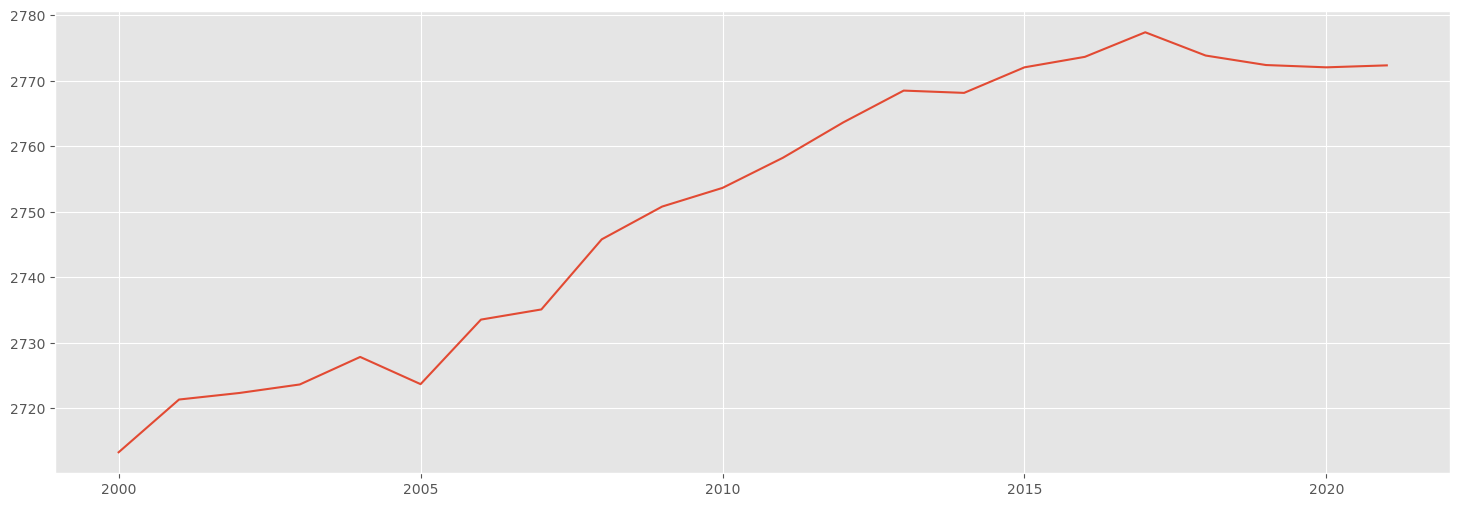

In [12]:
years = sorted(df['Year'].unique())
x = []
y = []
for year in years:
    year_rows = df[df['Year']==year]
    average_elo = year_rows['ELO'].mean()
    x.append(year)
    y.append(average_elo)
plt.figure(figsize=(18,6))
plt.plot(x, y)

In [13]:
df_group_by_year = df.groupby('Year')['ELO'].apply(list)
df_group_by_year

Year
2000    [2851, 2769, 2758, 2751, 2748, 2725, 2715, 270...
2001    [2849, 2790, 2772, 2746, 2745, 2745, 2718, 271...
2002    [2838, 2809, 2757, 2742, 2742, 2739, 2727, 271...
2003    [2847, 2809, 2753, 2743, 2736, 2734, 2734, 272...
2004    [2831, 2777, 2766, 2747, 2736, 2735, 2732, 272...
2005    [2804, 2786, 2757, 2754, 2749, 2741, 2741, 273...
2006    [2812, 2801, 2792, 2765, 2752, 2741, 2740, 272...
2007    [2783, 2779, 2766, 2754, 2750, 2749, 2744, 274...
2008    [2799, 2799, 2780, 2765, 2763, 2760, 2755, 275...
2009    [2796, 2791, 2779, 2776, 2771, 2761, 2760, 275...
2010    [2810, 2805, 2790, 2788, 2781, 2761, 2759, 274...
2011    [2814, 2810, 2805, 2784, 2776, 2775, 2773, 277...
2012    [2835, 2805, 2801, 2799, 2773, 2770, 2769, 276...
2013    [2861, 2810, 2802, 2793, 2781, 2780, 2772, 277...
2014    [2872, 2812, 2789, 2787, 2785, 2782, 2777, 277...
2015    [2862, 2820, 2810, 2800, 2797, 2797, 2784, 278...
2016    [2844, 2801, 2798, 2792, 2787, 2787, 2785, 278...
2017    [

Text(0.5, 1.0, 'Tiem trend for avarge ELO')

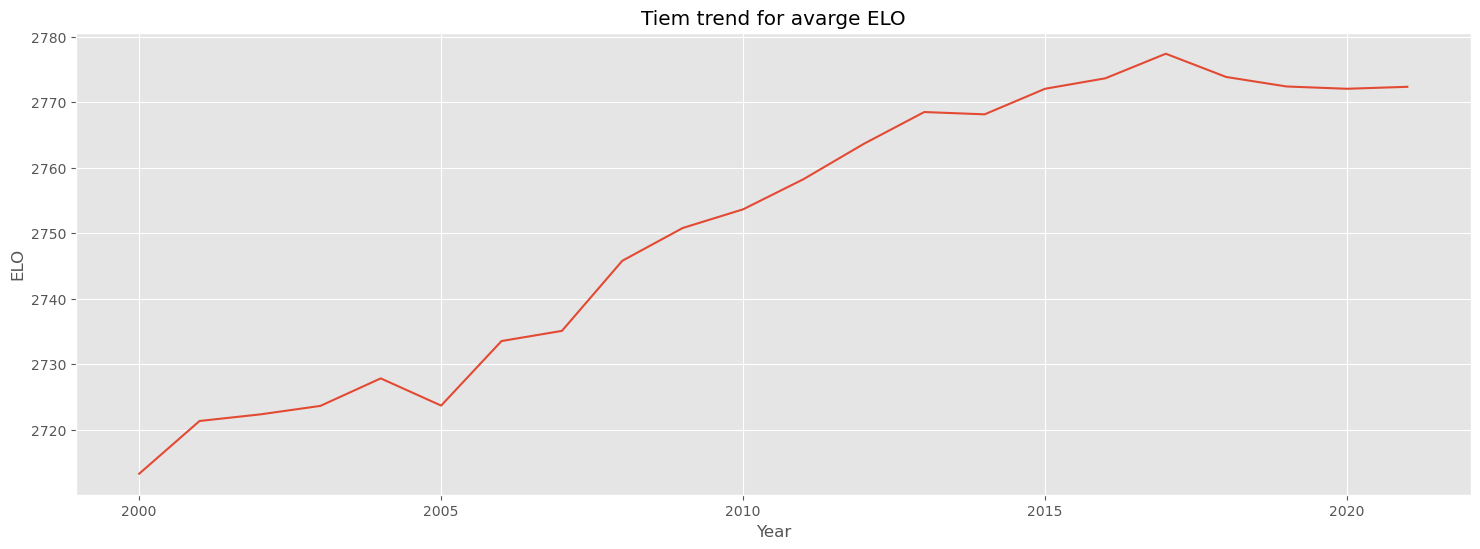

In [14]:
plt.figure(figsize=(18,6))
plt.plot(df.groupby('Year')['ELO'].mean())
plt.xlabel('Year')
plt.ylabel('ELO')
plt.title('Tiem trend for avarge ELO')

In [15]:
player_names = df['Name'].unique()
player_names

array(['Carlsen', 'Caruana', 'Ding Liren', 'Nepomniachtchi',
       'Vachier-Lagrave', 'Aronian', 'Grischuk', 'Mamedyarov', 'So',
       'Radjabov', 'Giri', 'Wang Hao', 'Rapport', 'Dominguez Perez',
       'Karjakin', 'Anand', 'Kramnik', 'Firouzja', 'Duda', 'Nakamura',
       'Vitiugov', 'Topalov', 'Yu Yangyi', 'Navara', 'Svidler',
       'Harikrishna', 'Eljanov', 'Ivanchuk', 'Adams', 'Wojtaszek',
       'Li Chao', 'Gelfand', 'Andreikin', 'Bacrot', 'Morozevich',
       'Kamsky', 'Gashimov', 'Leko', 'Jakovenko', 'Tomashevsky',
       'Ponomariov', 'Wang Yue', 'Shirov', 'Movsesian S', 'Cheparinov',
       'Alekseev', 'Polgar J', 'Akopian', 'Kasparov', 'Bareev', 'Dreev',
       'Vallejo Pons', 'Sokolov Ivan', 'Volokitin', 'Short', 'Malakhov',
       'Khalifman', 'Karpov', 'Smirin', 'Van Wely', 'Kasimdzhanov',
       'Lautier', 'Gurevich Mikhail', 'Bologan', 'Fedorov', 'Georgiev',
       'Almasi', 'Azmaiparashvili'], dtype=object)

C:\Users\User\AppData\Local\Temp\ipykernel_6400\3057937489.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(18, 6))


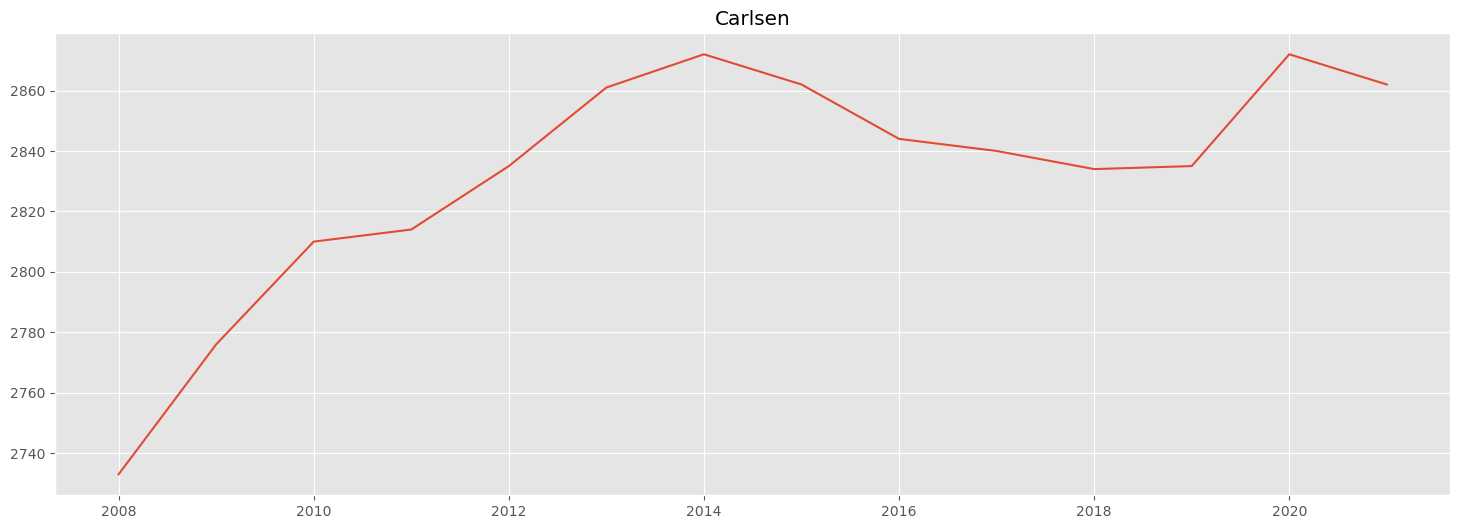

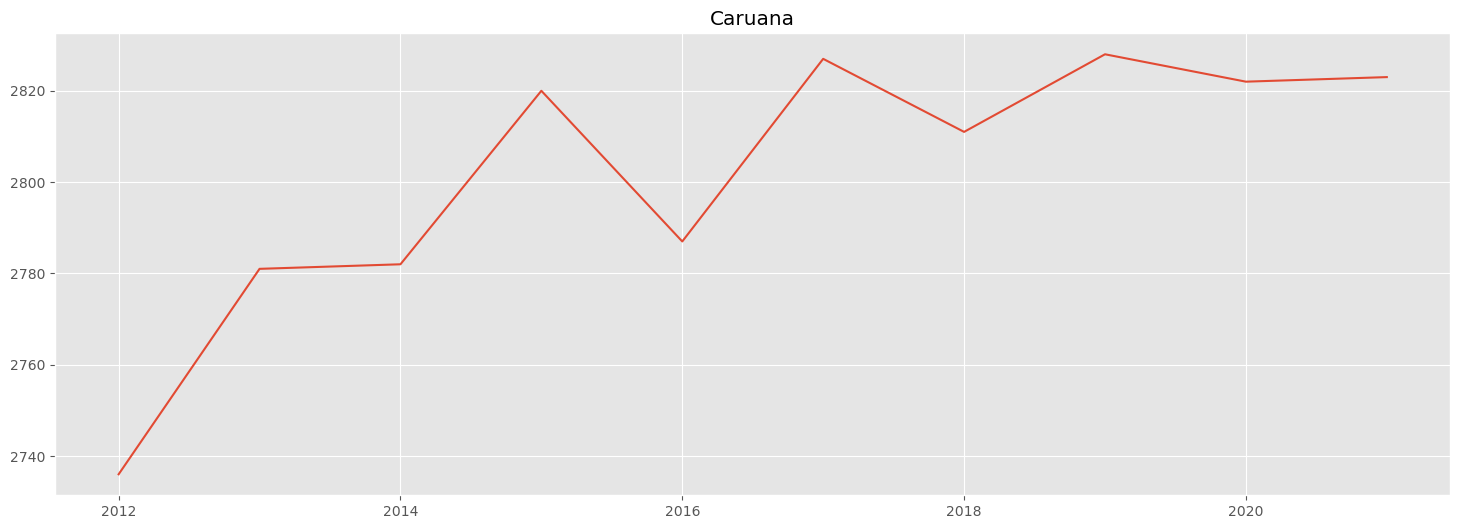

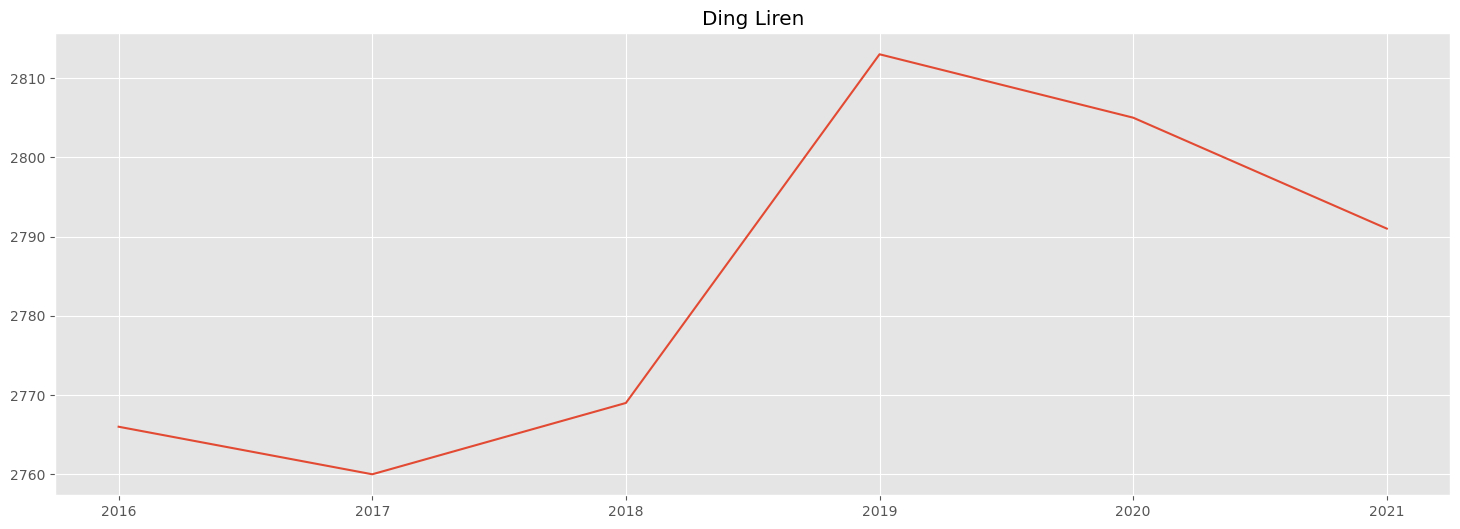

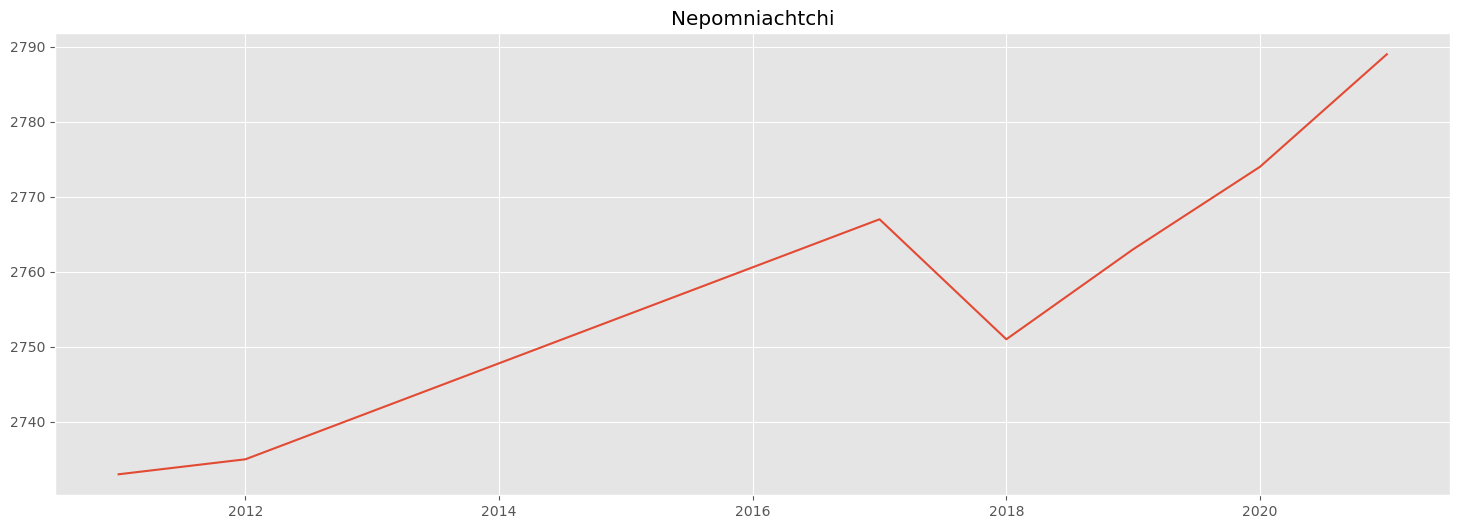

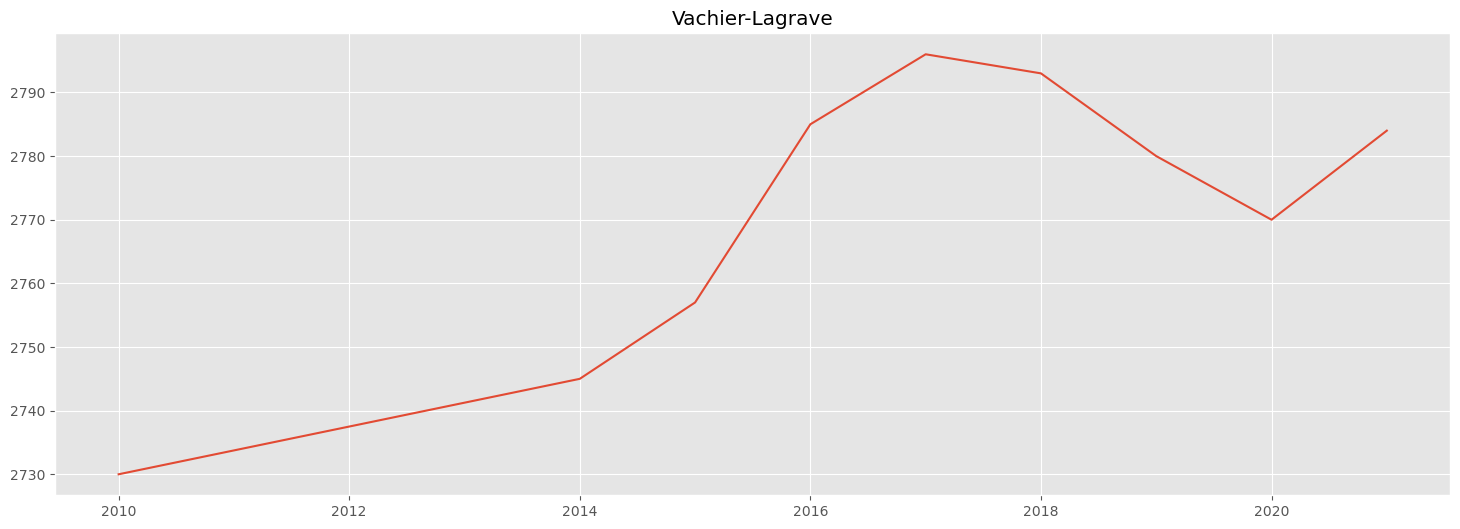

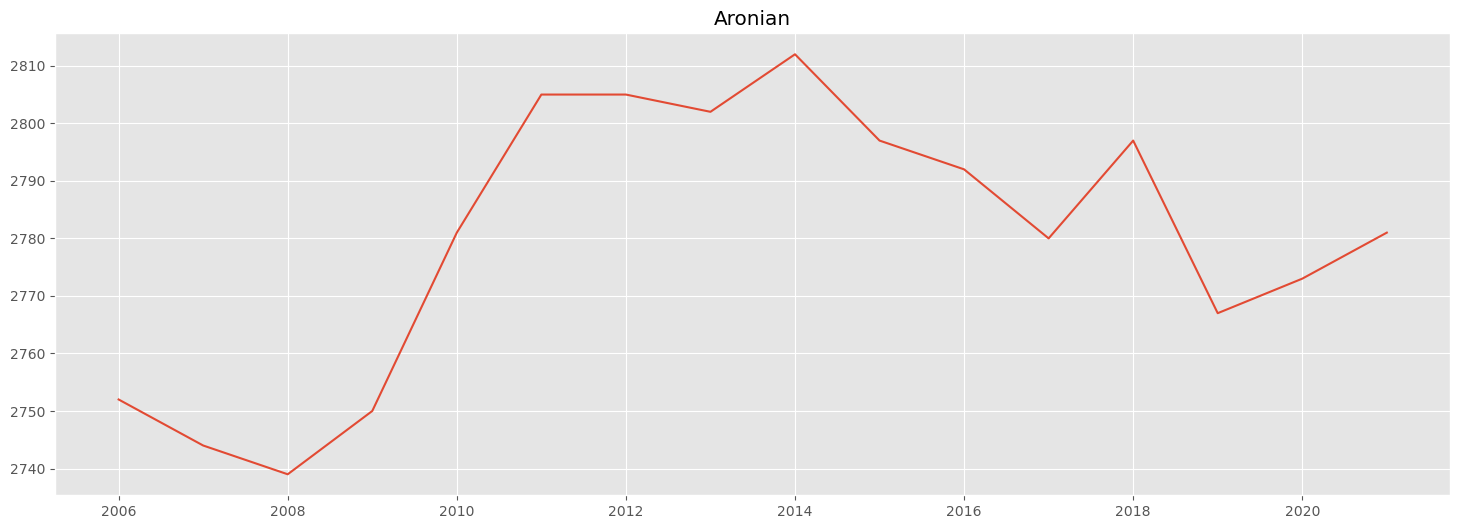

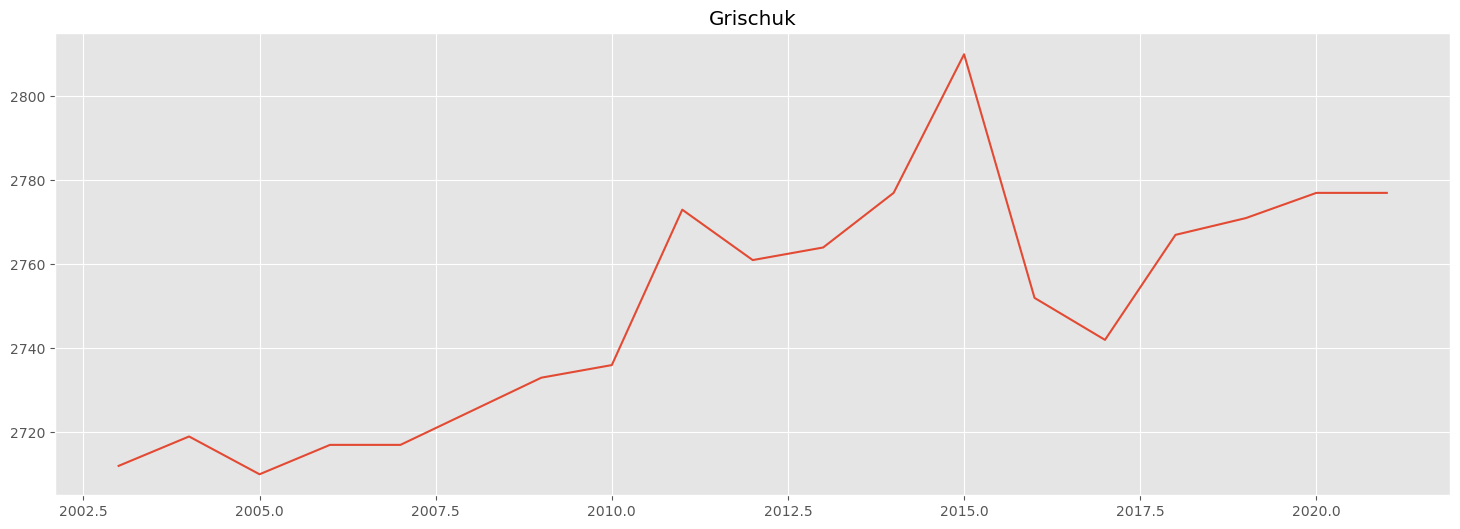

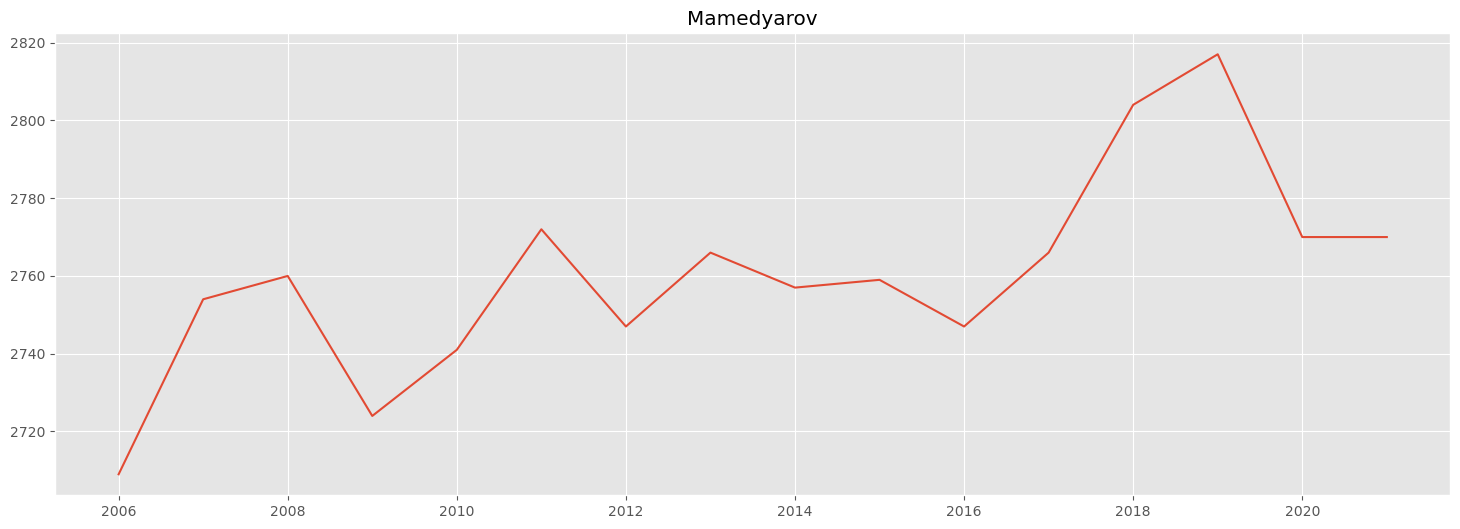

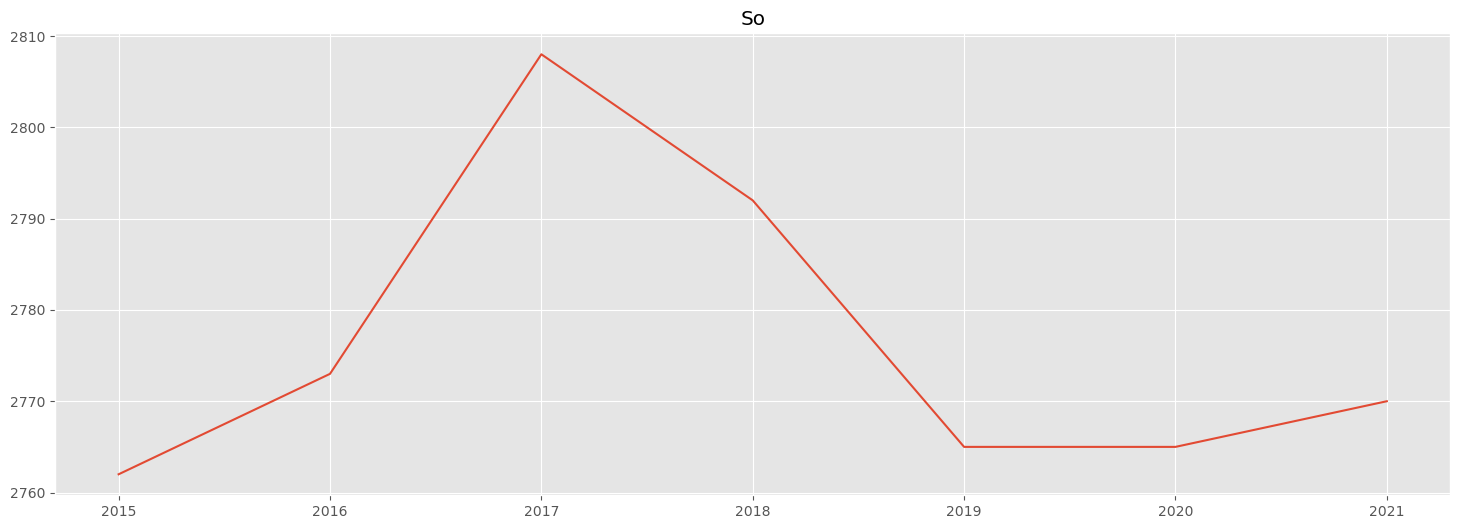

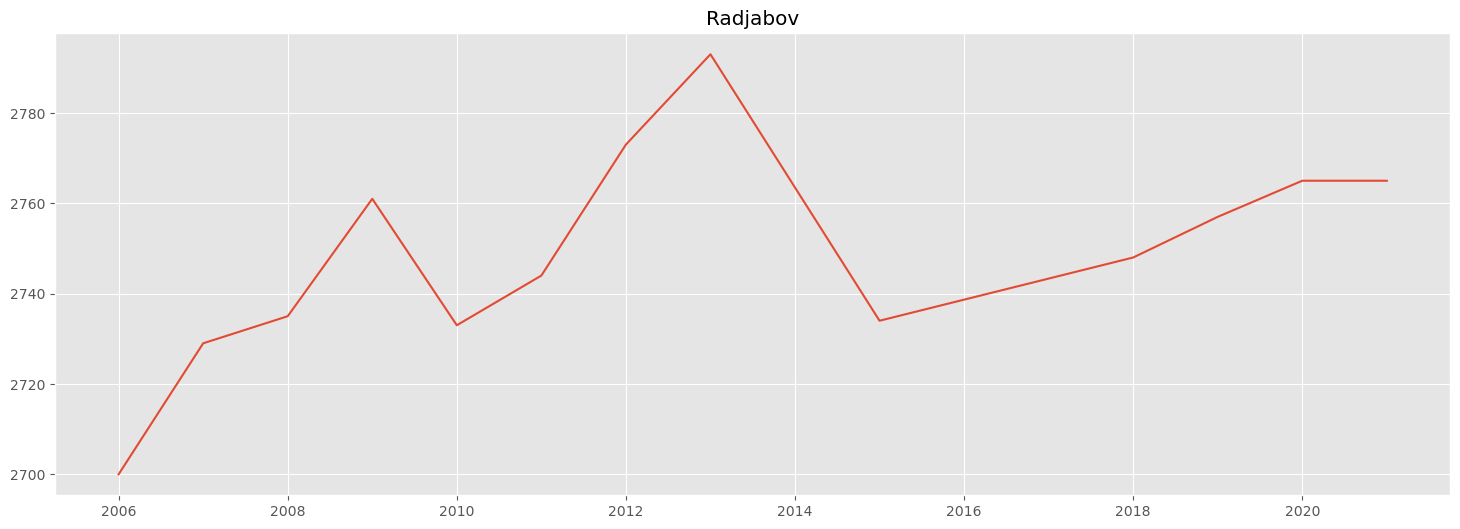

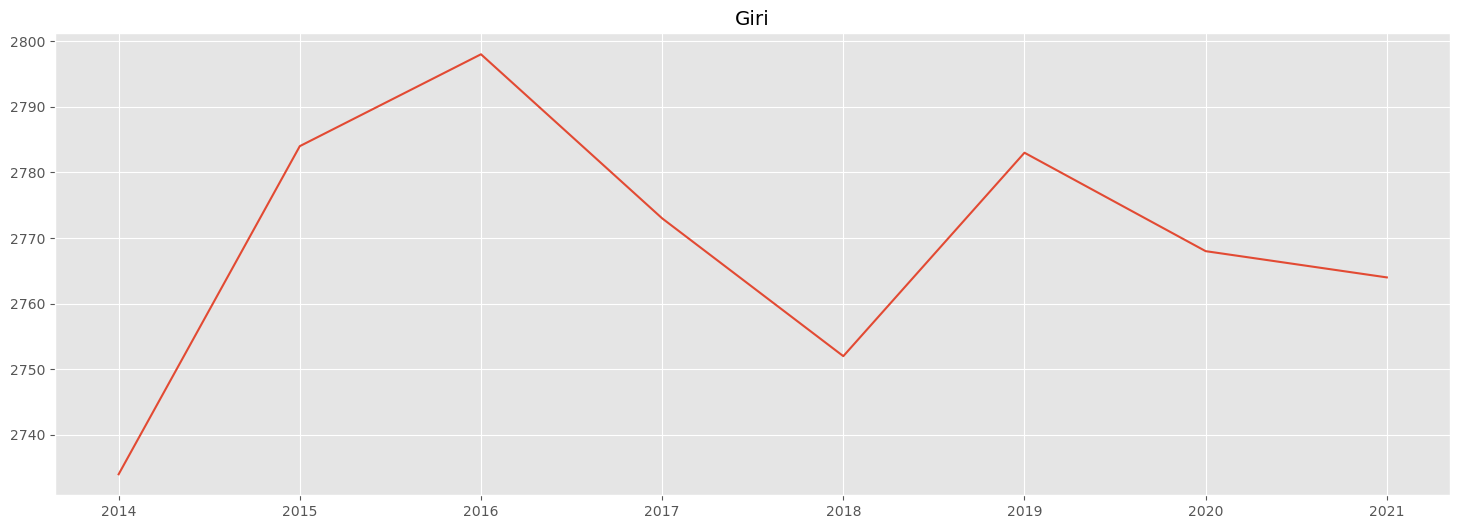

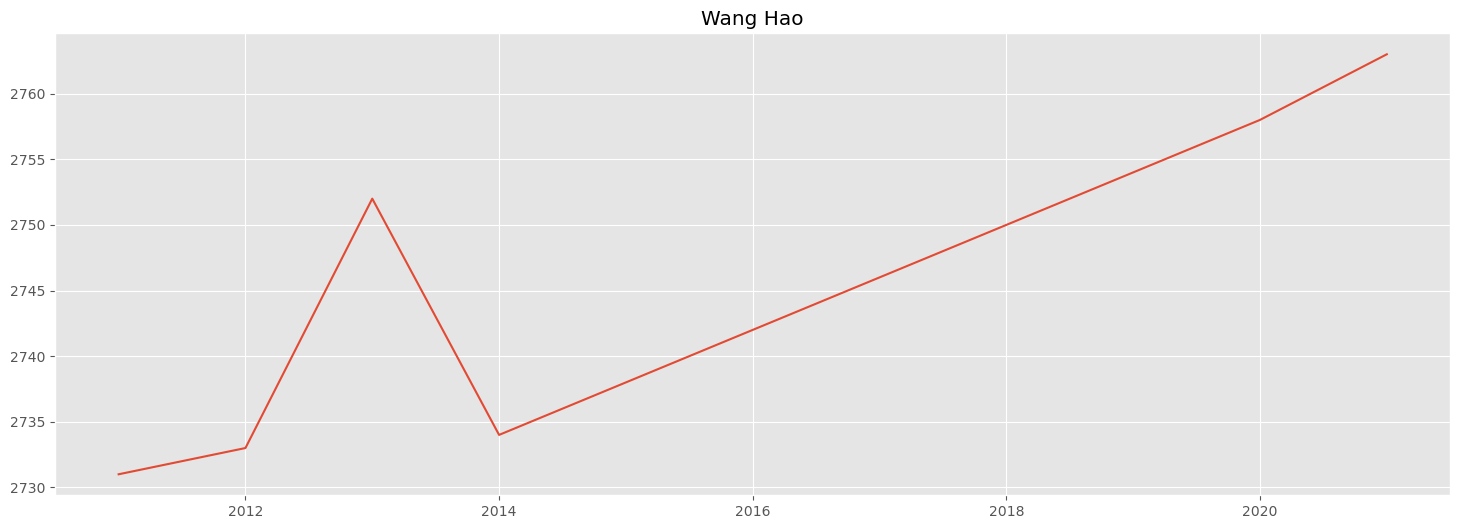

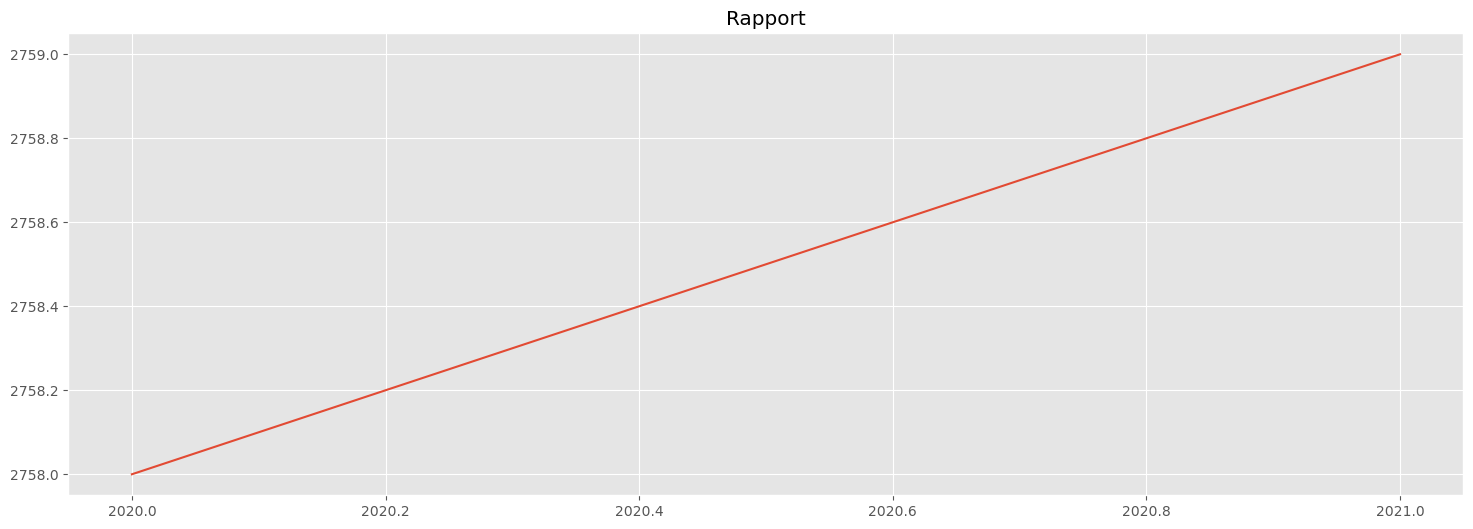

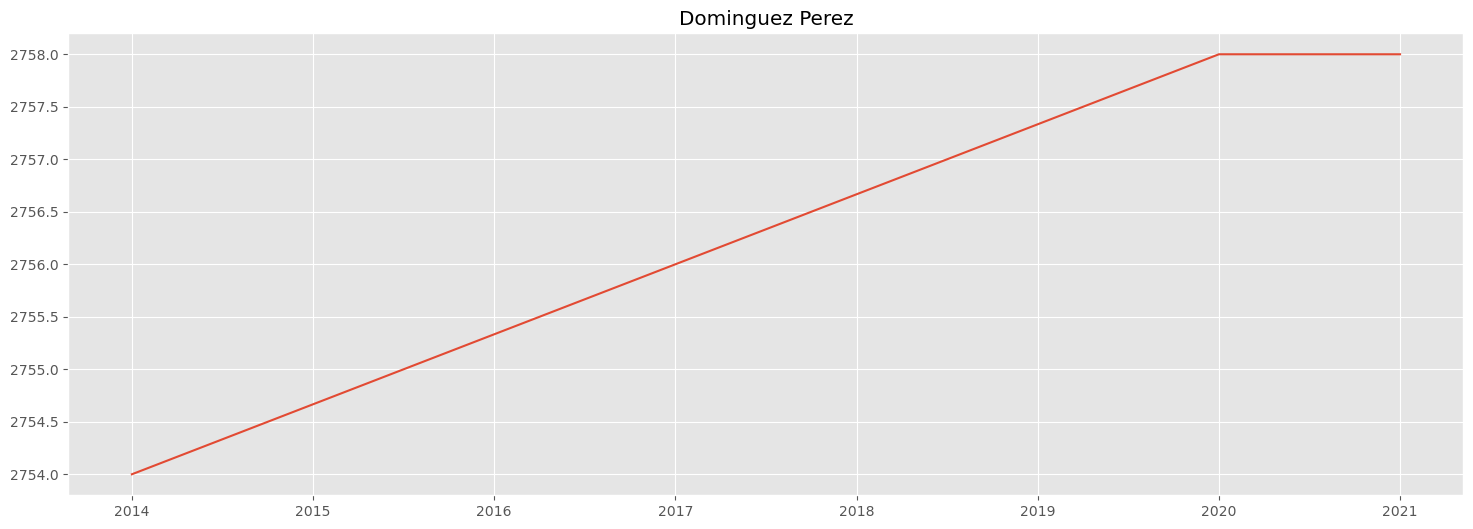

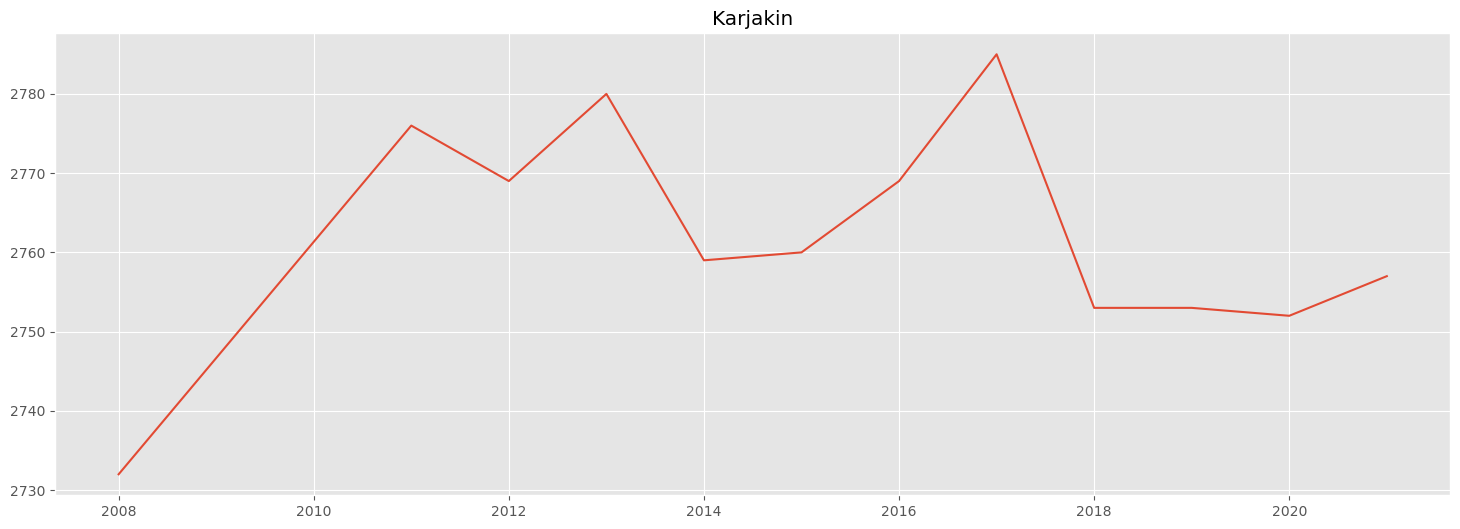

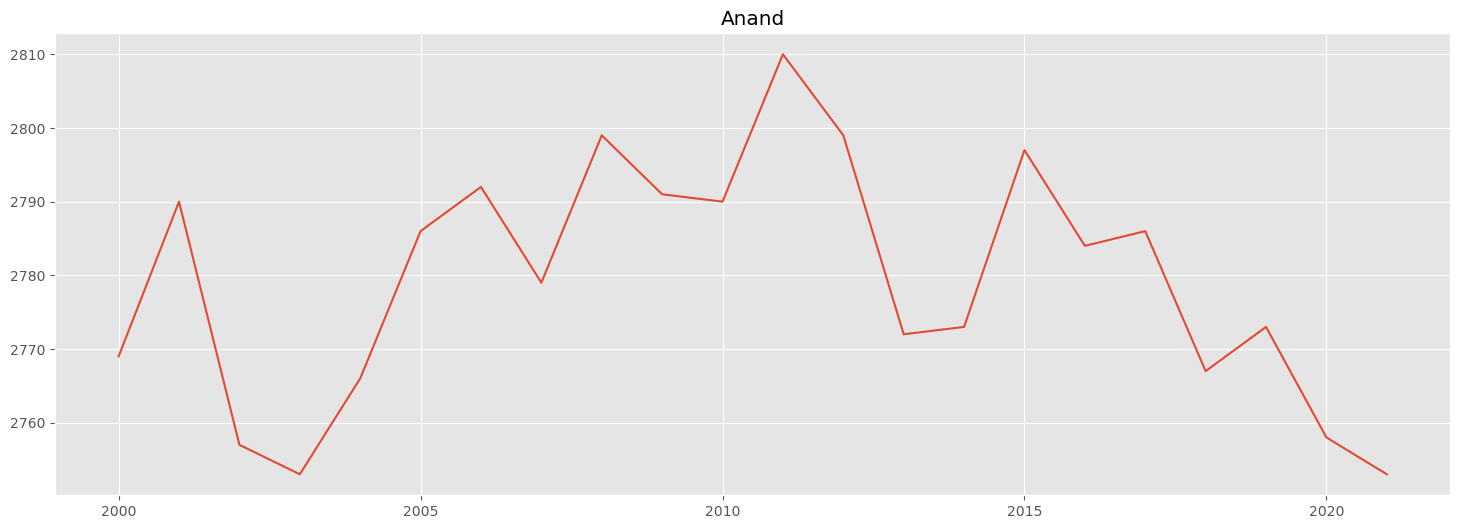

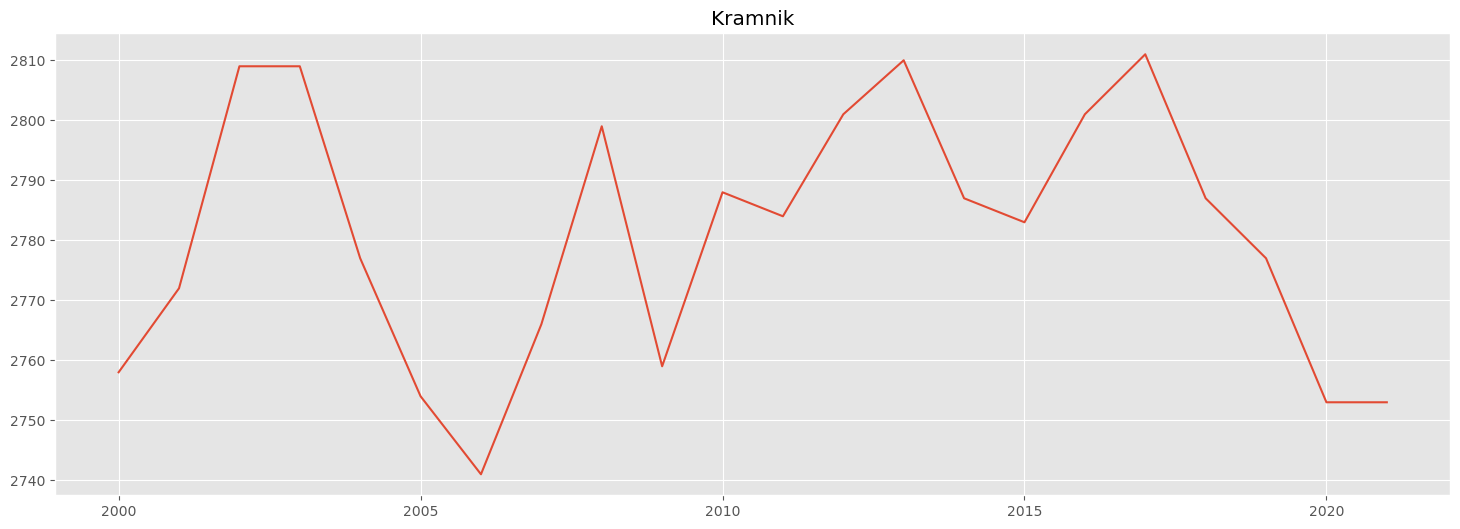

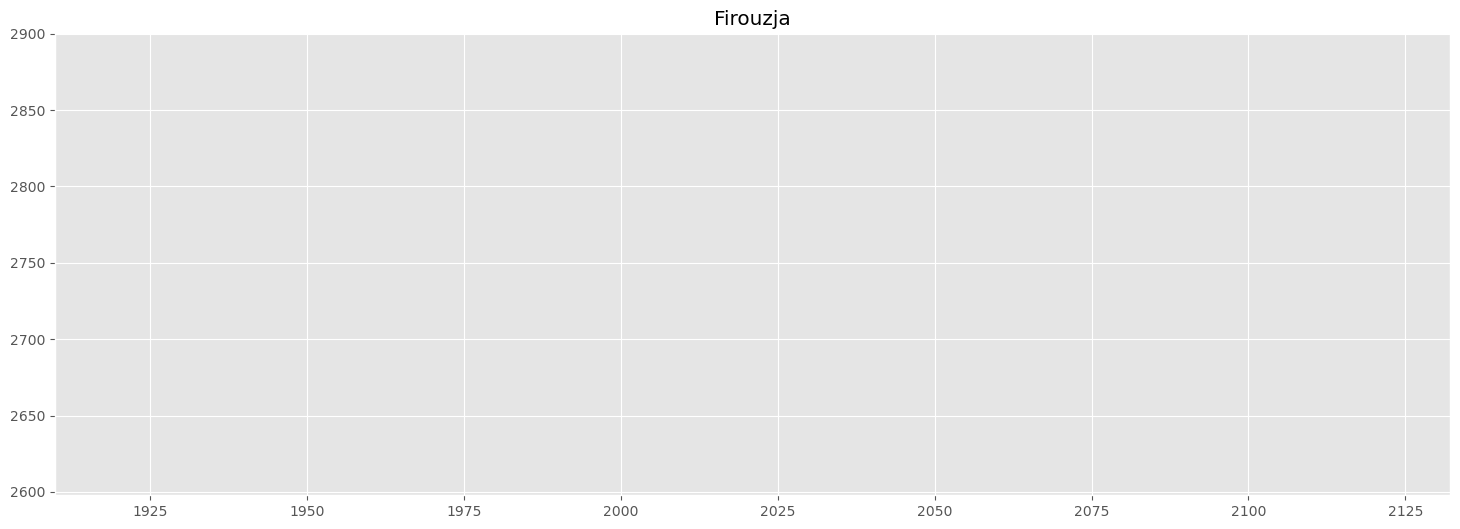

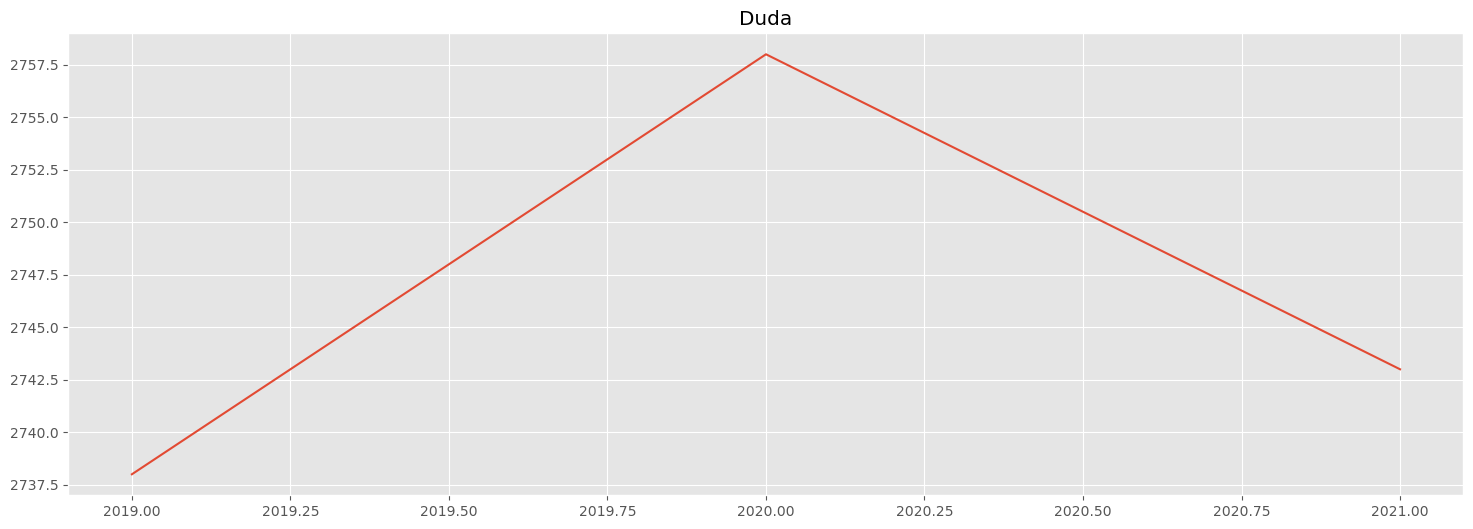

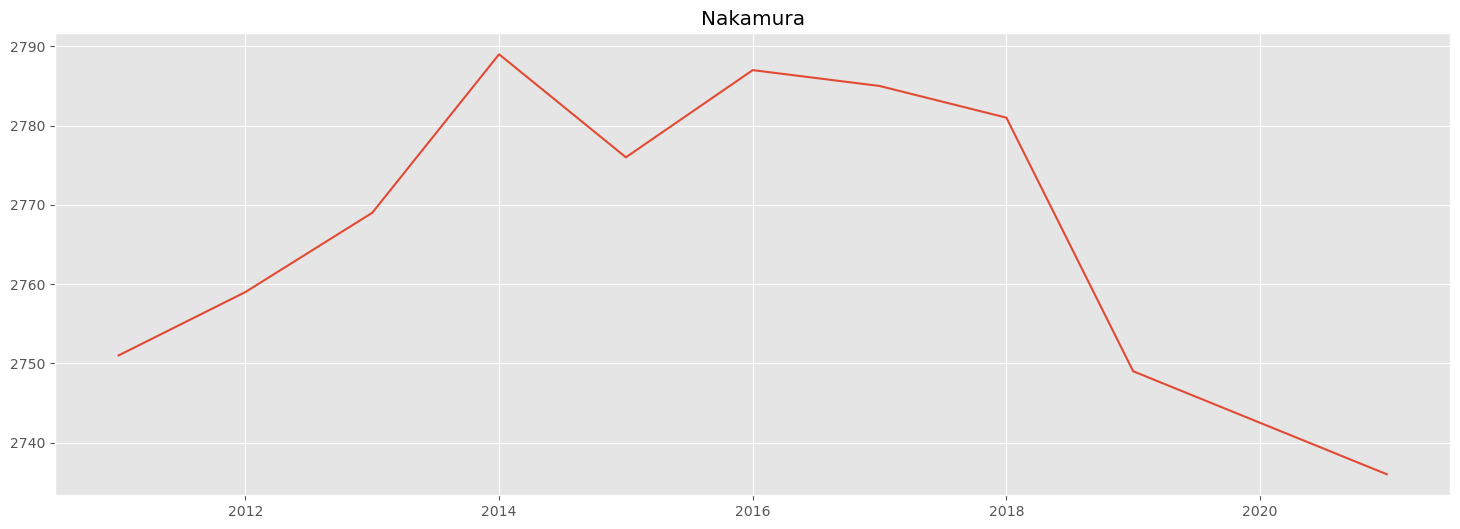

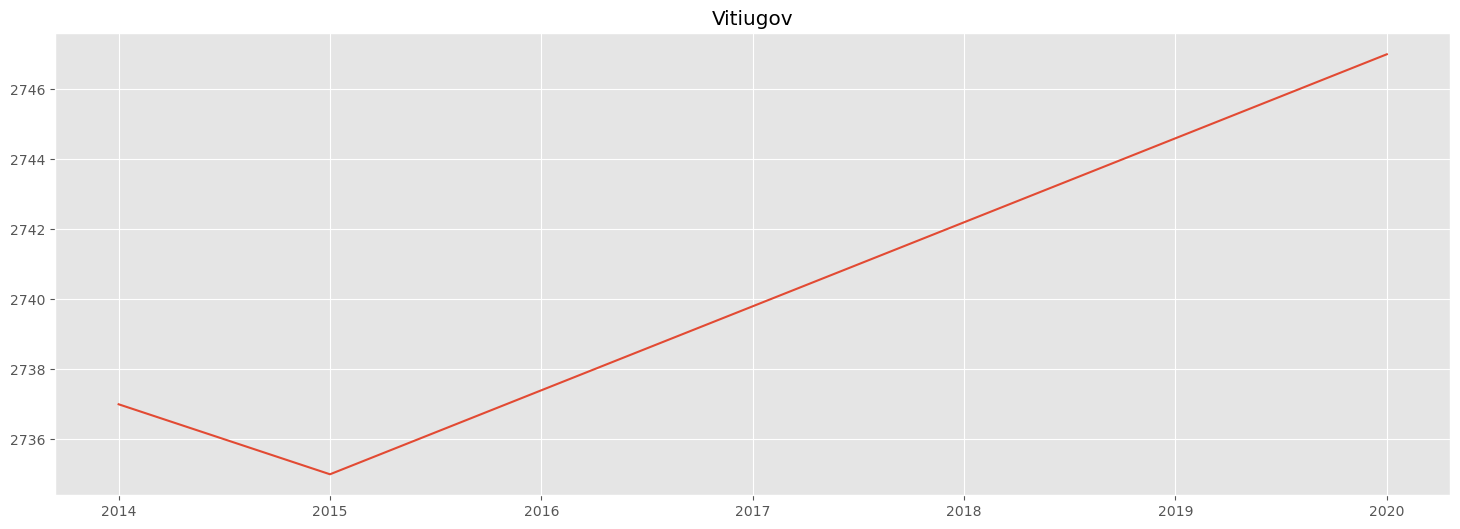

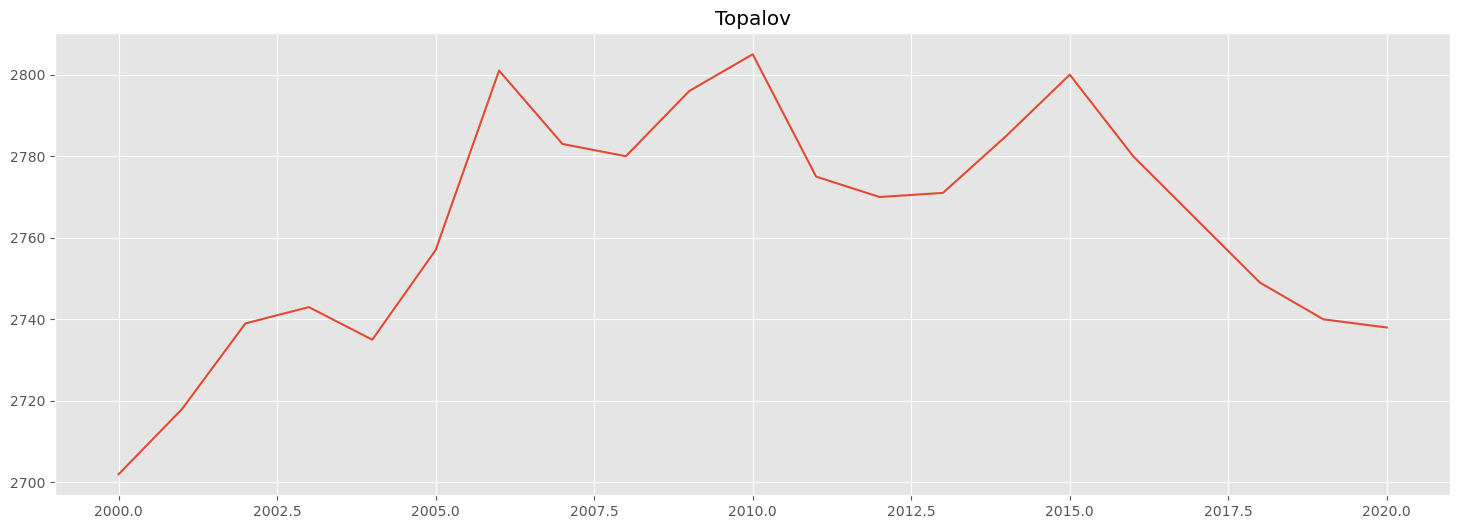

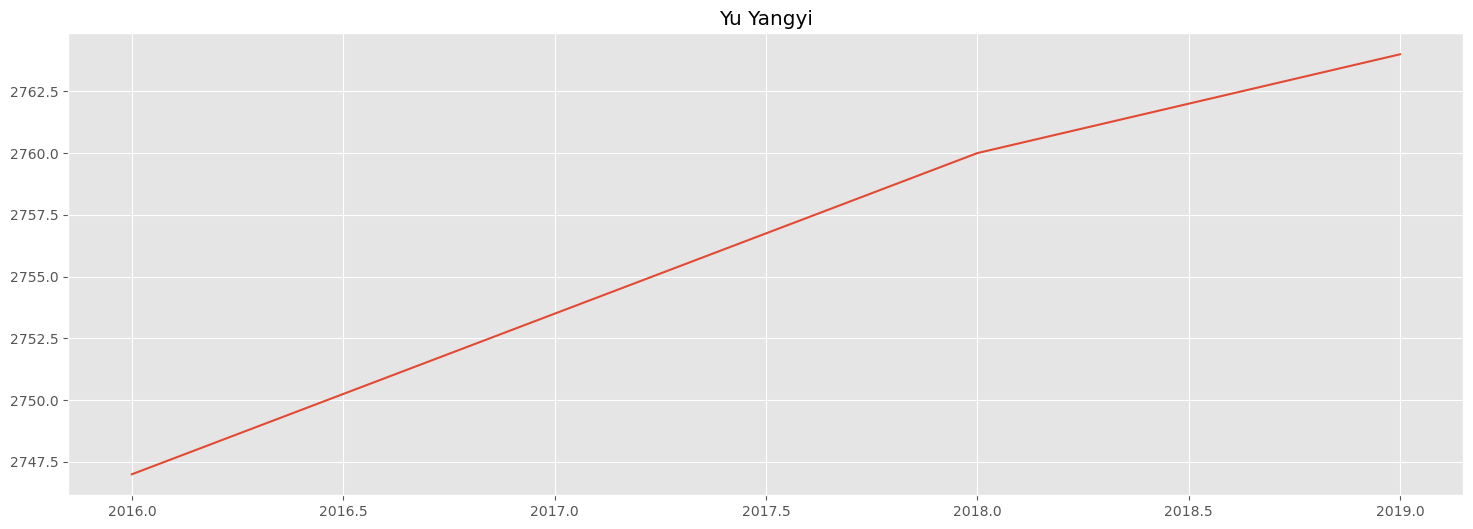

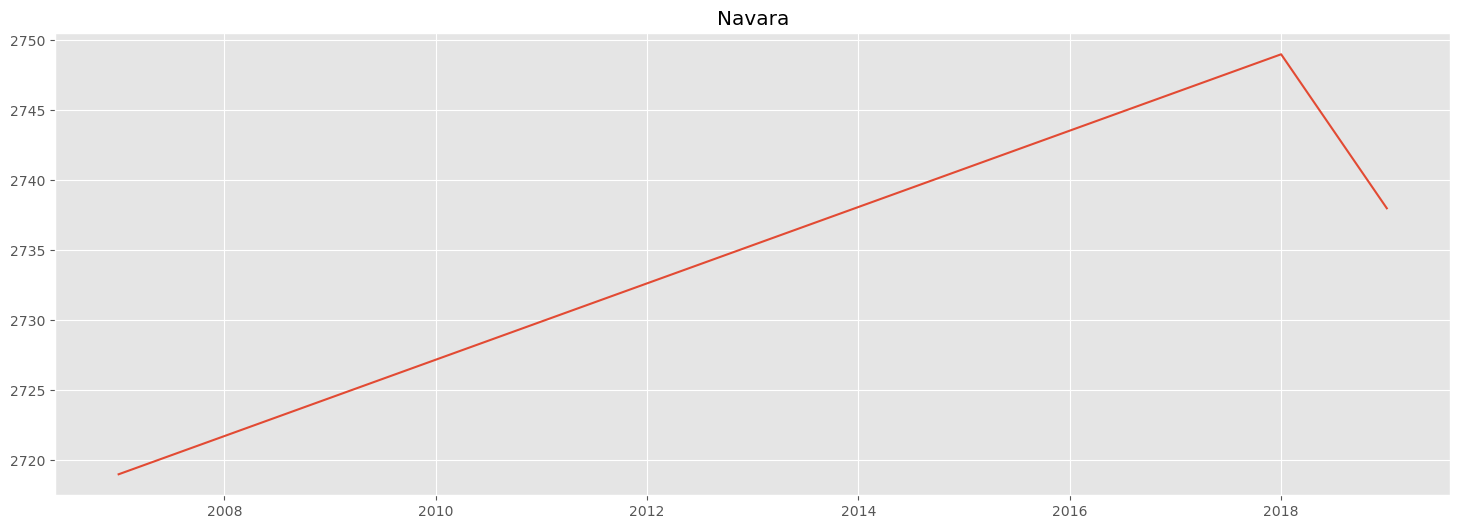

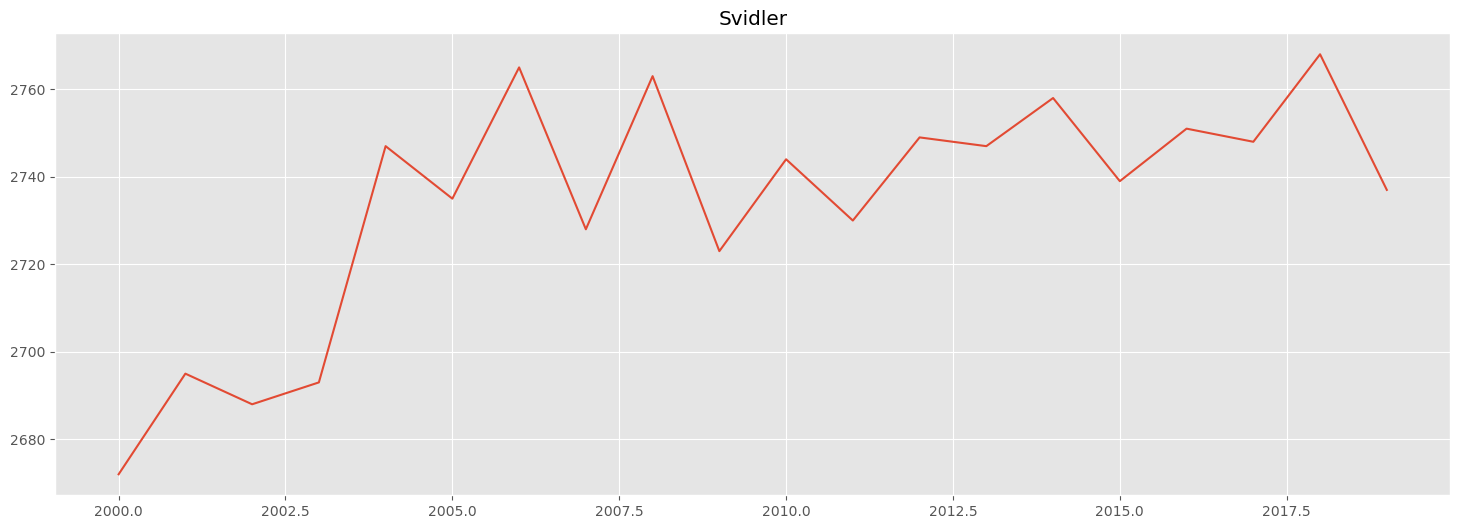

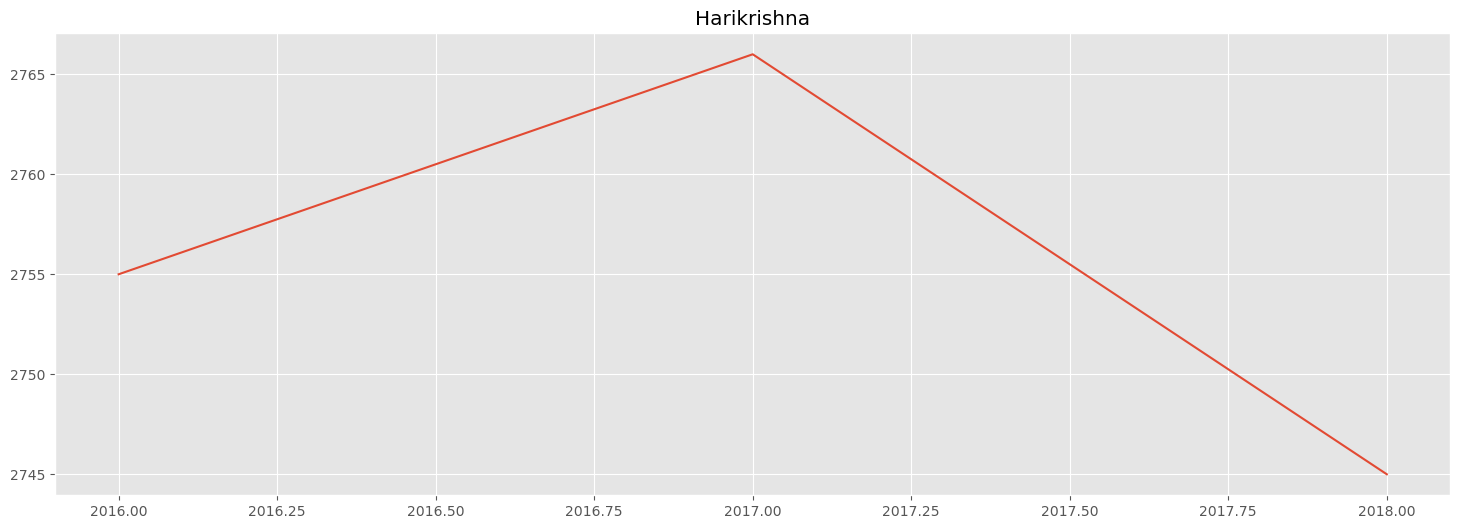

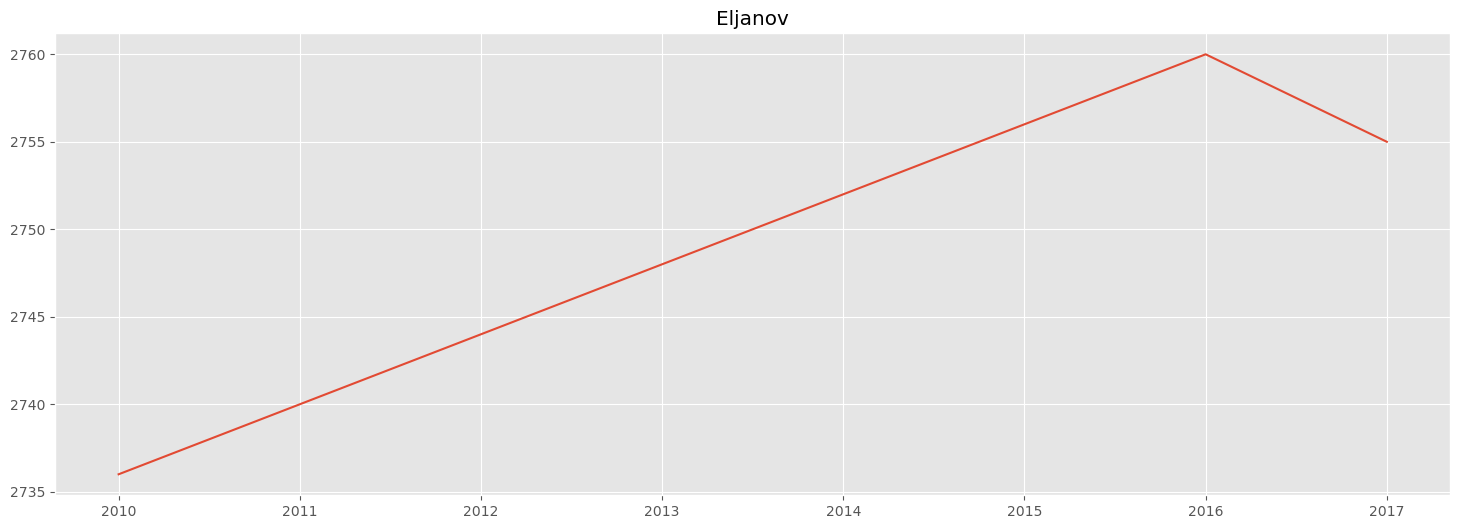

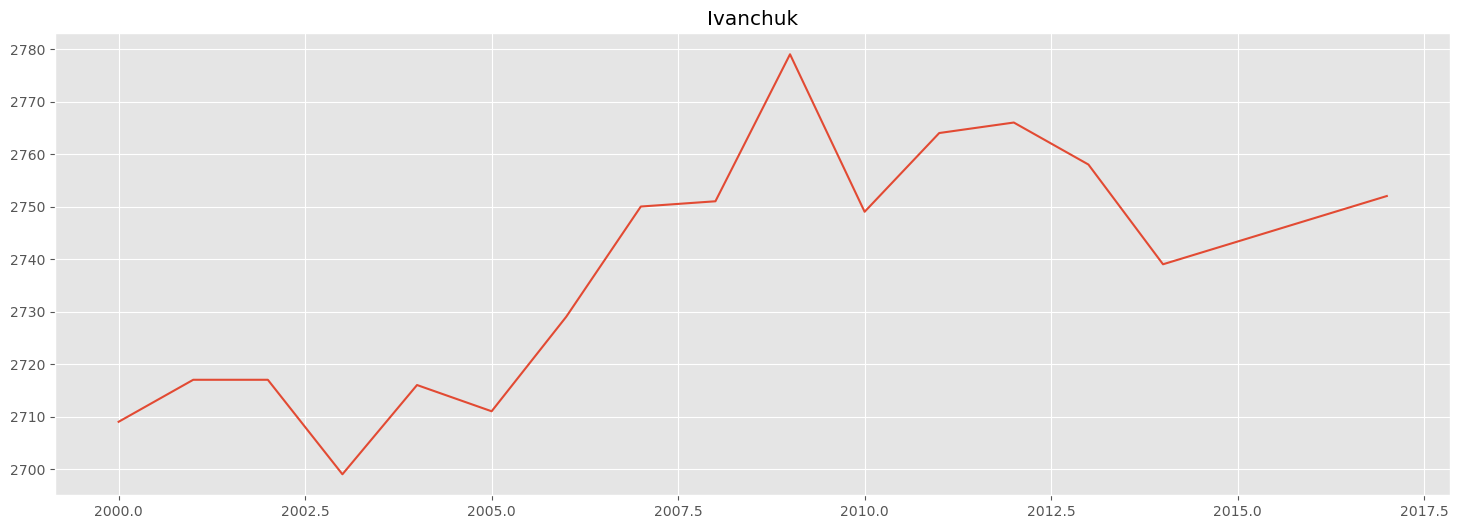

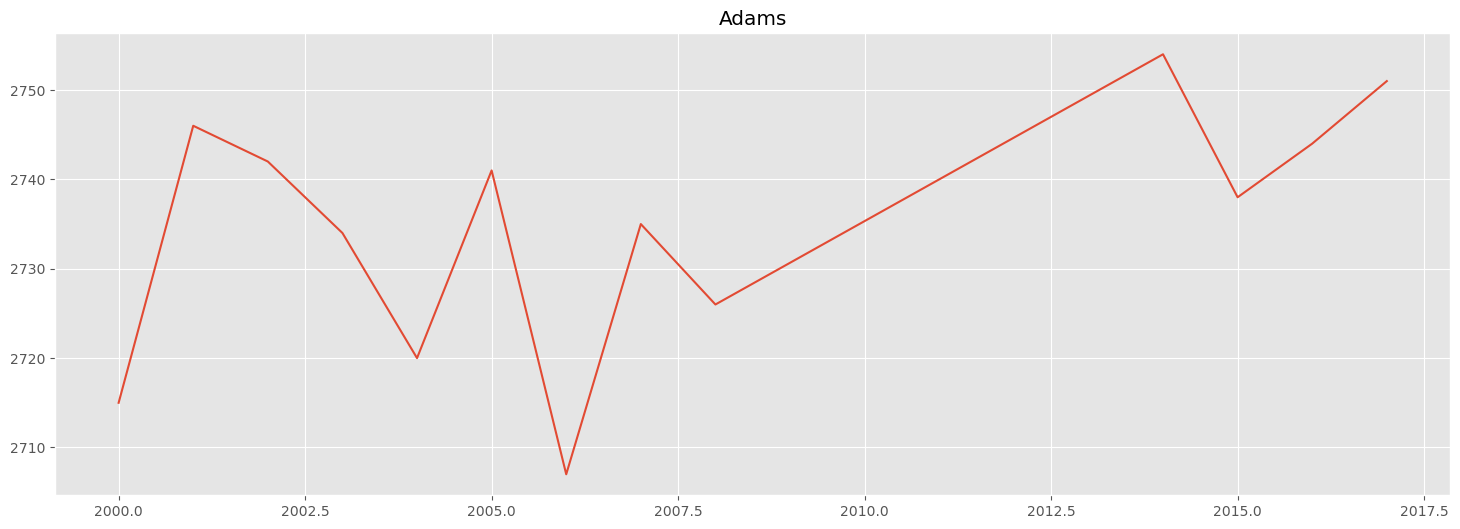

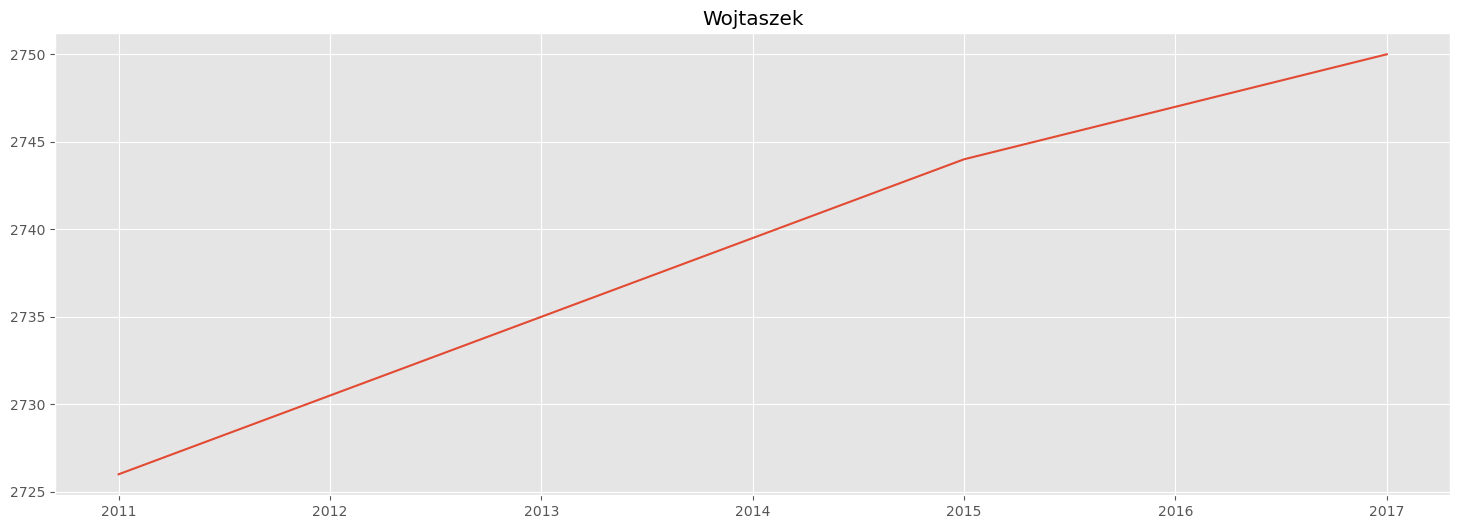

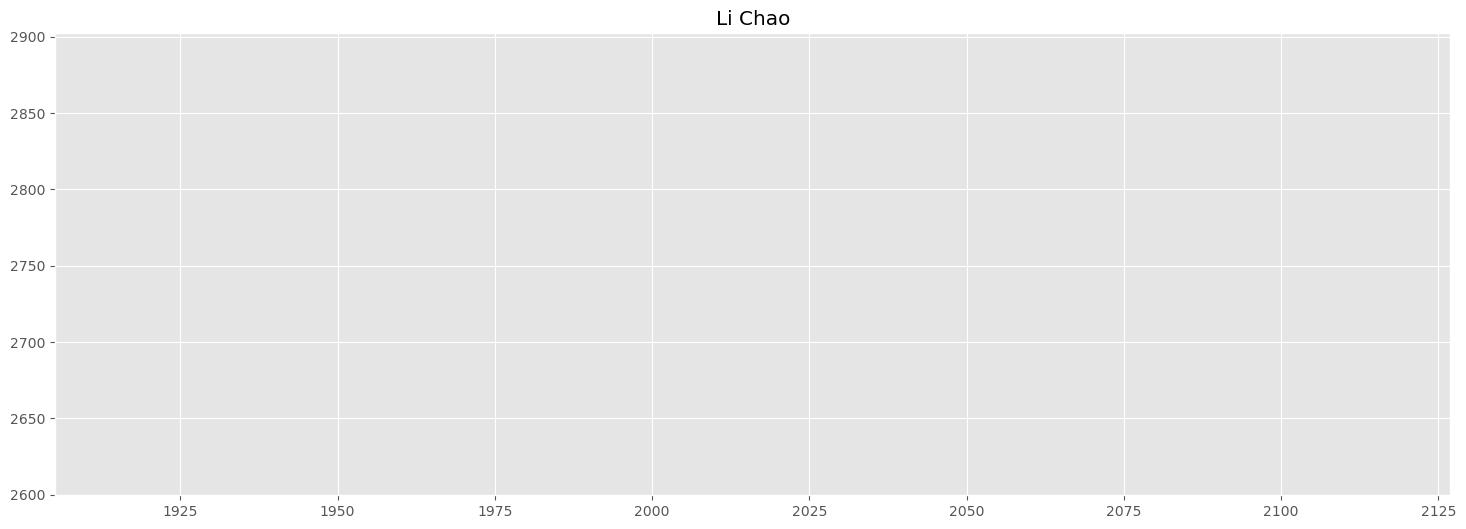

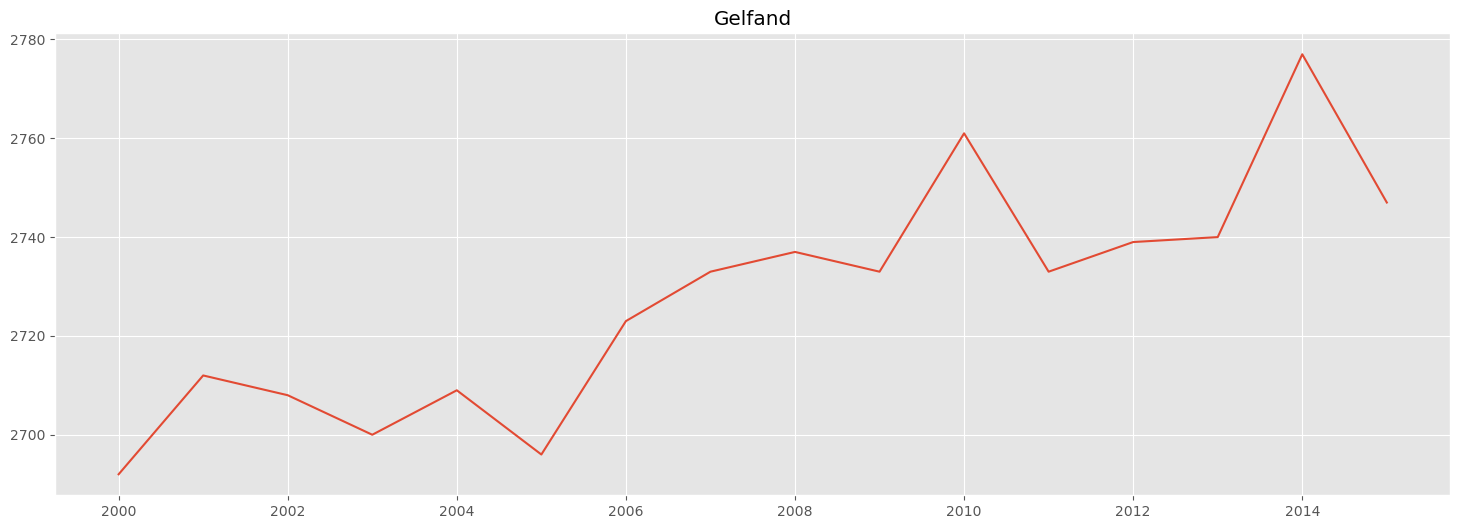

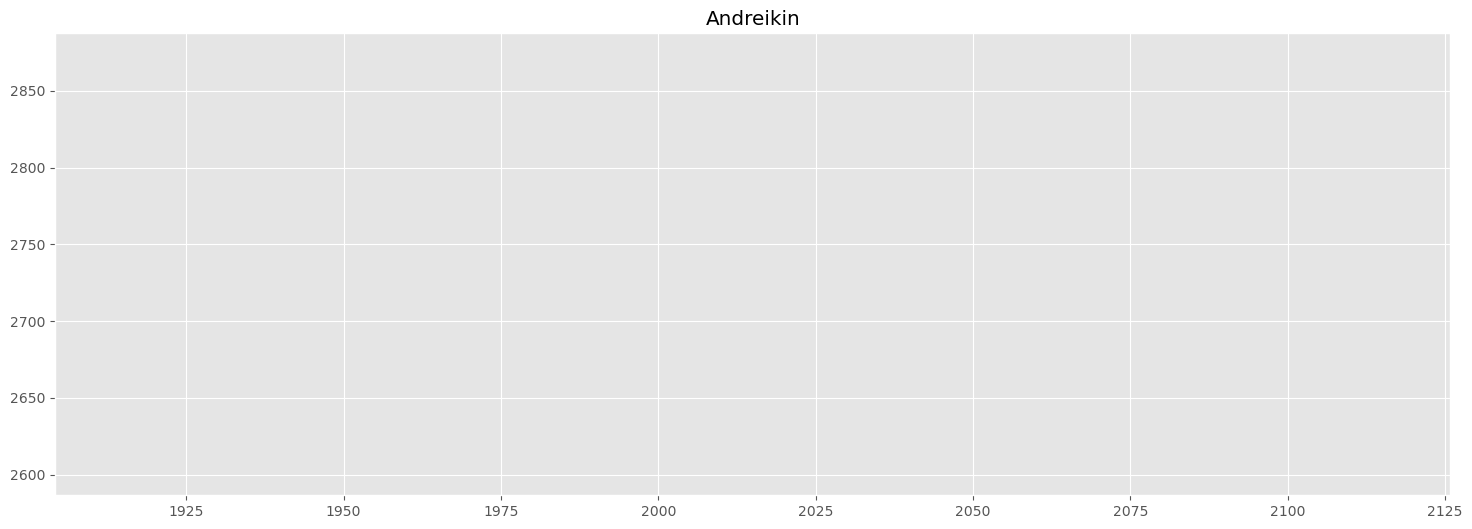

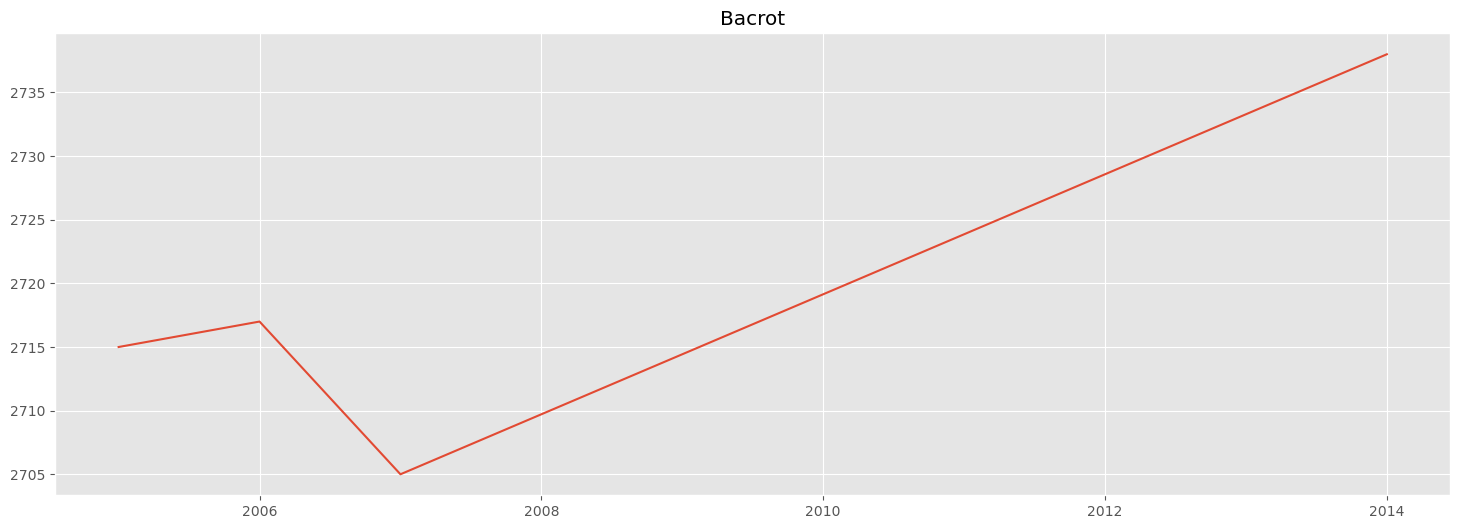

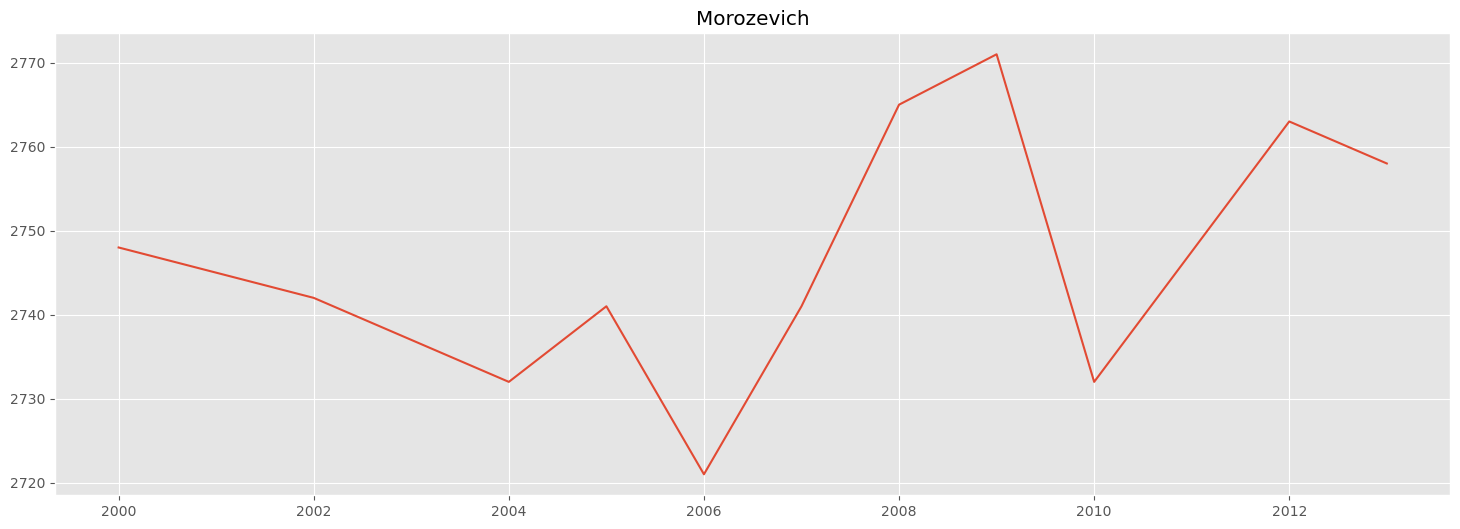

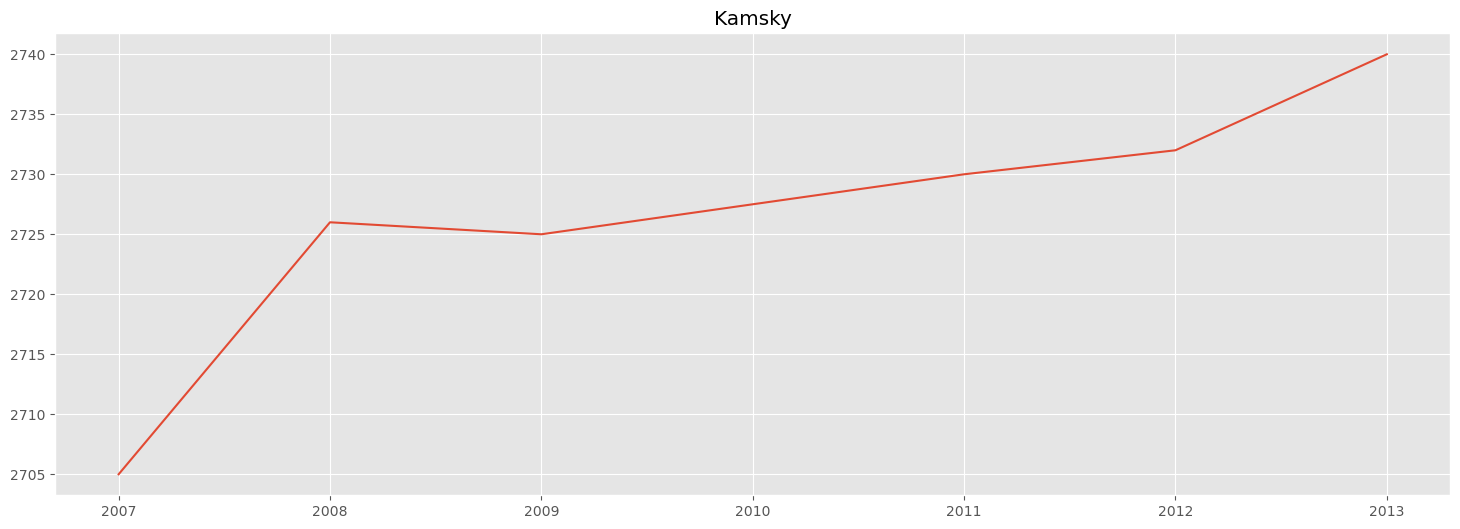

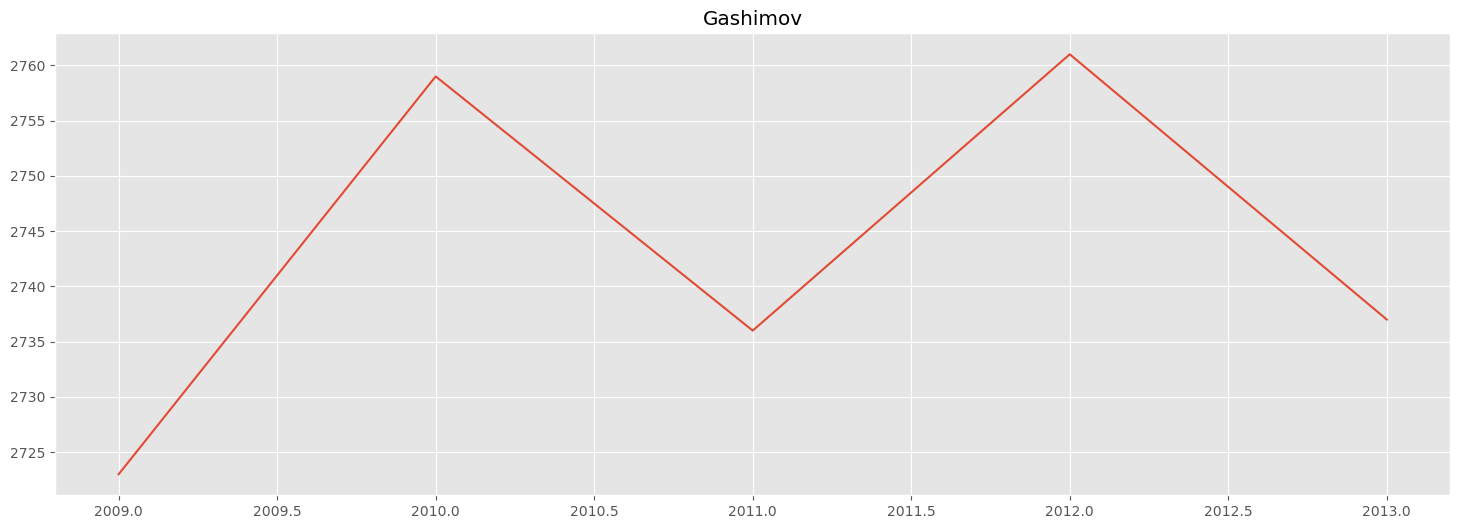

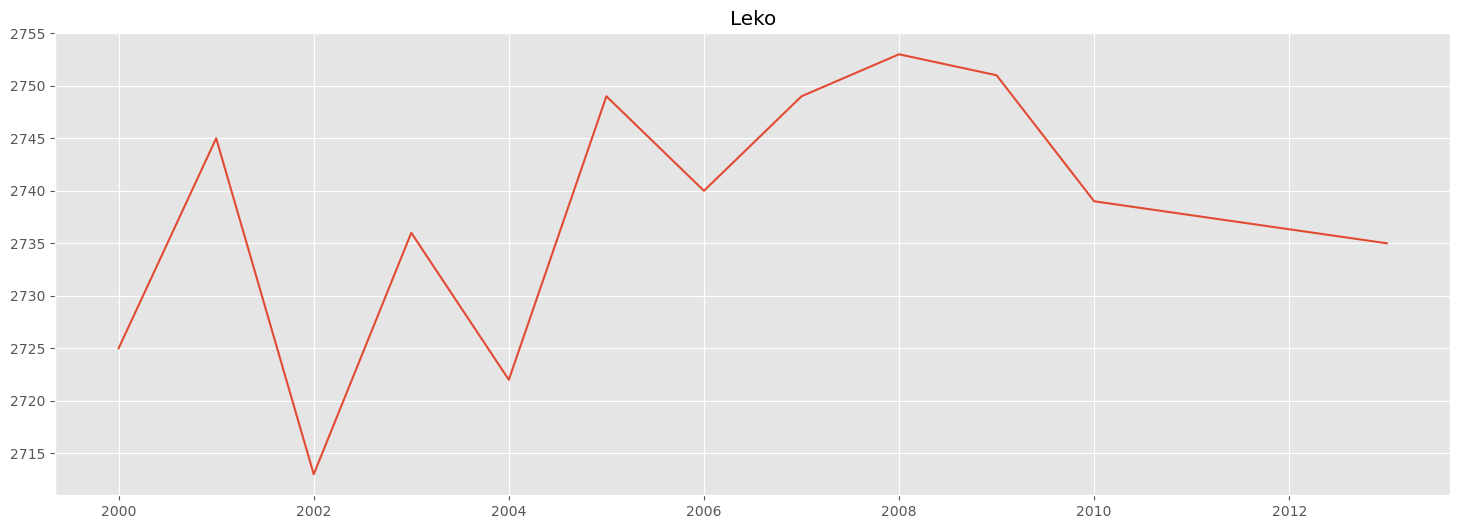

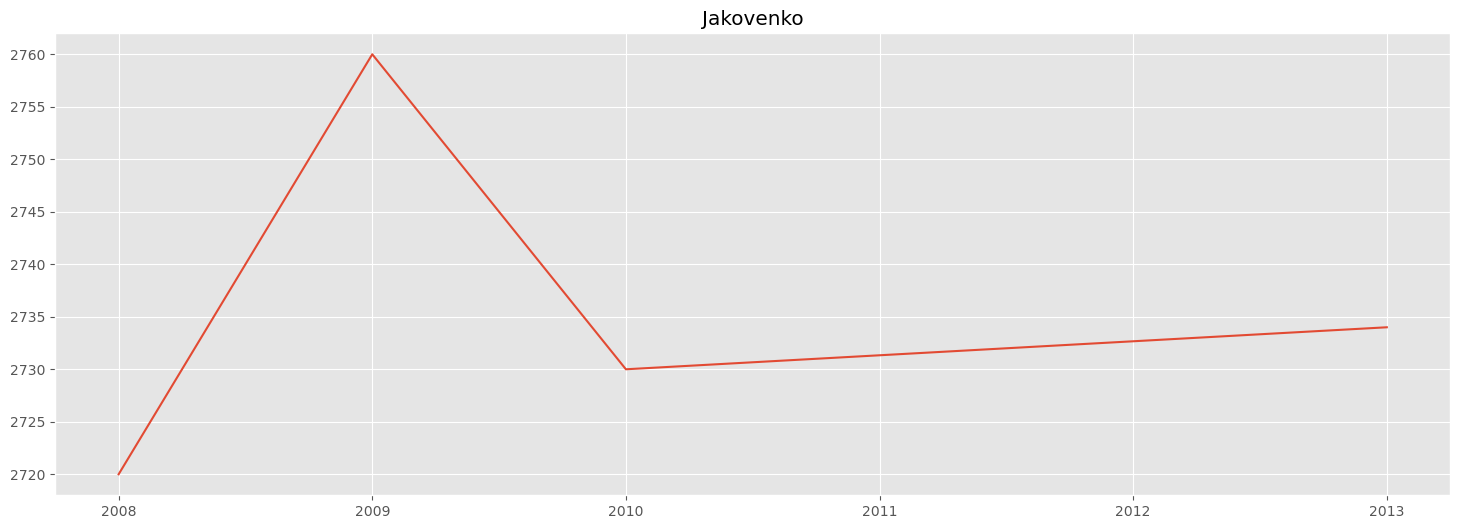

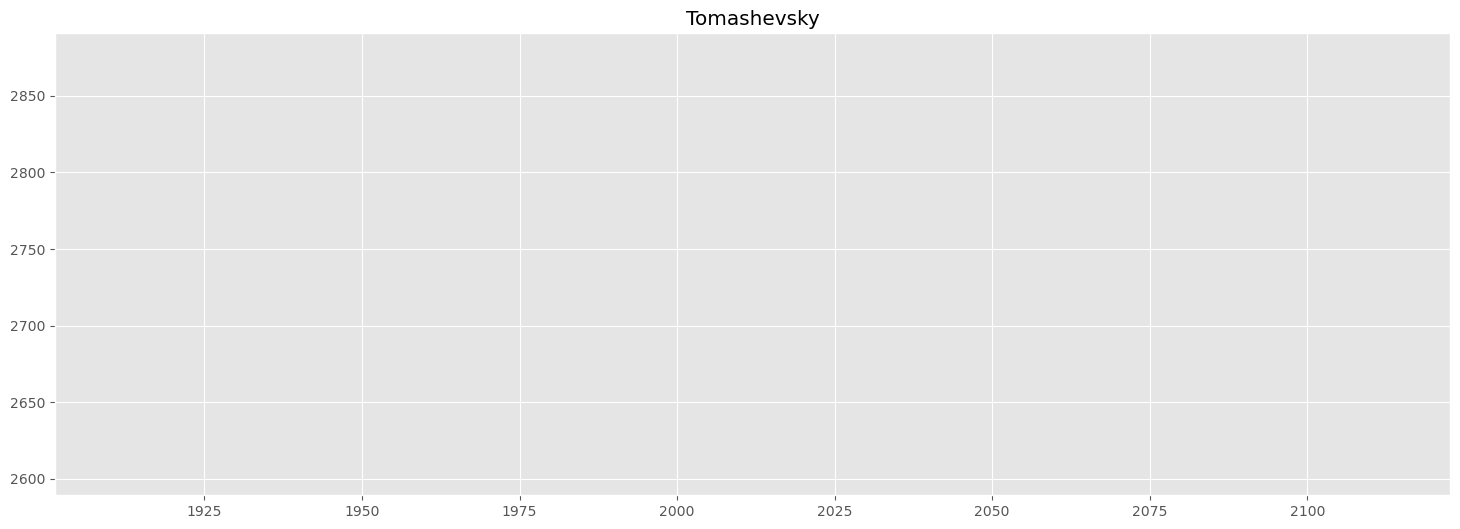

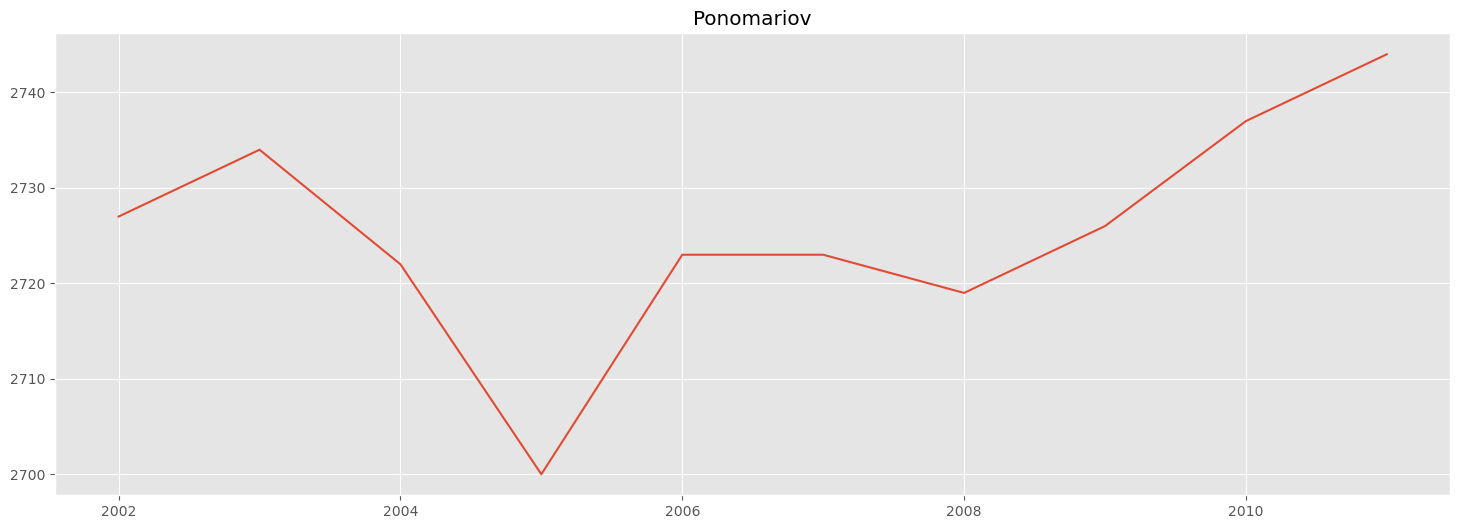

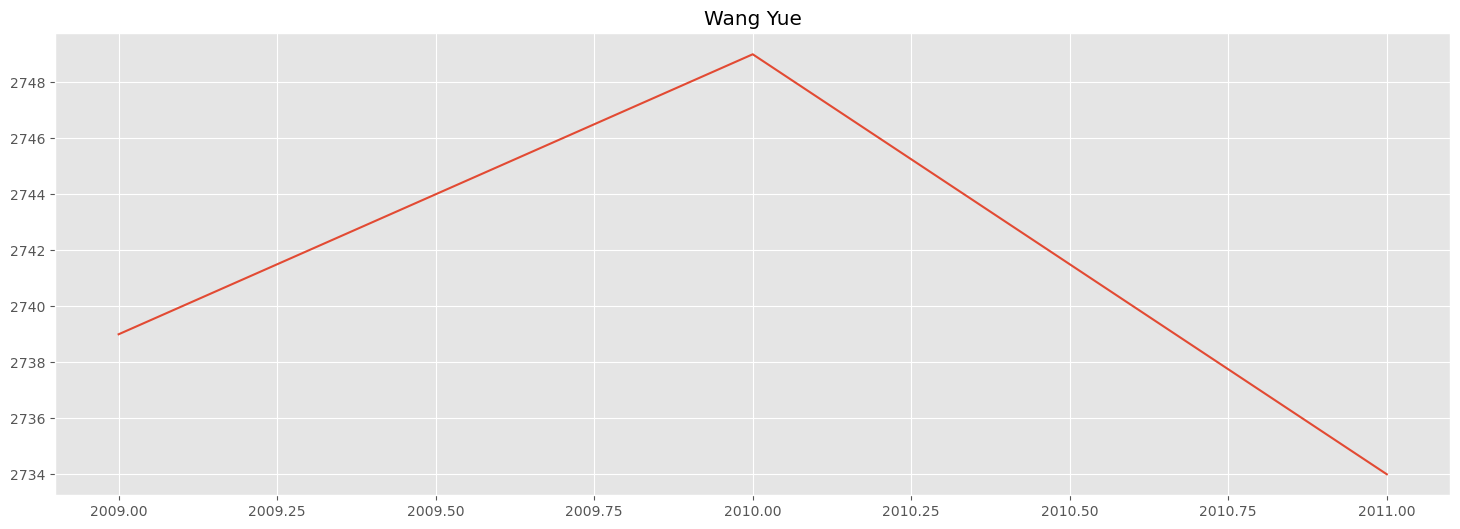

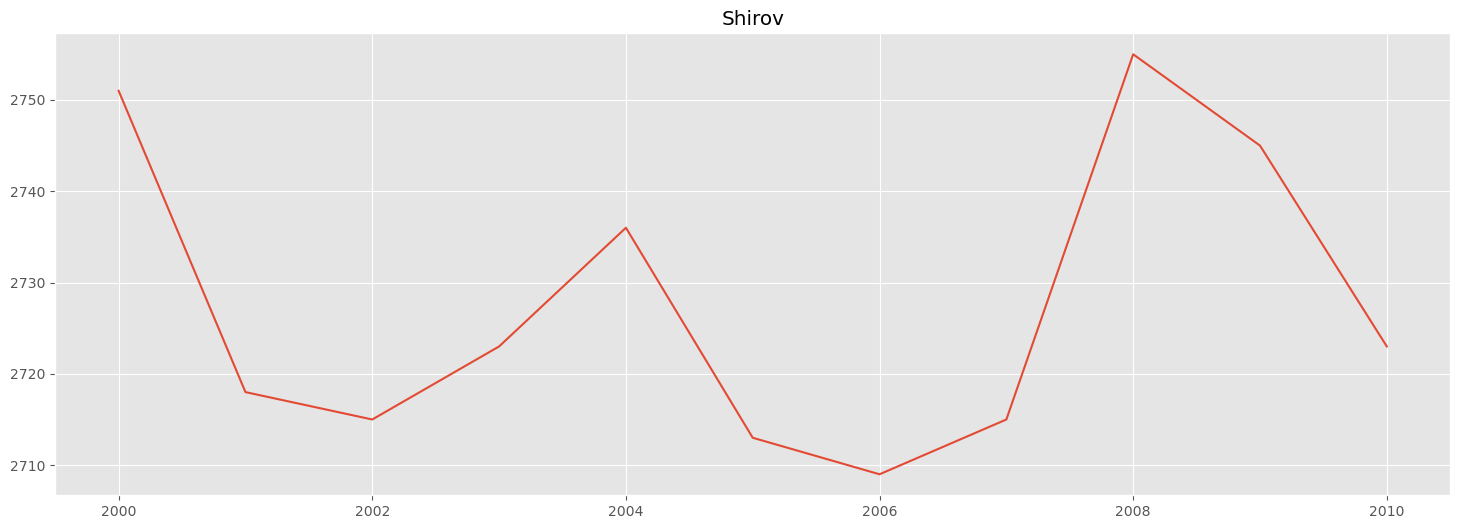

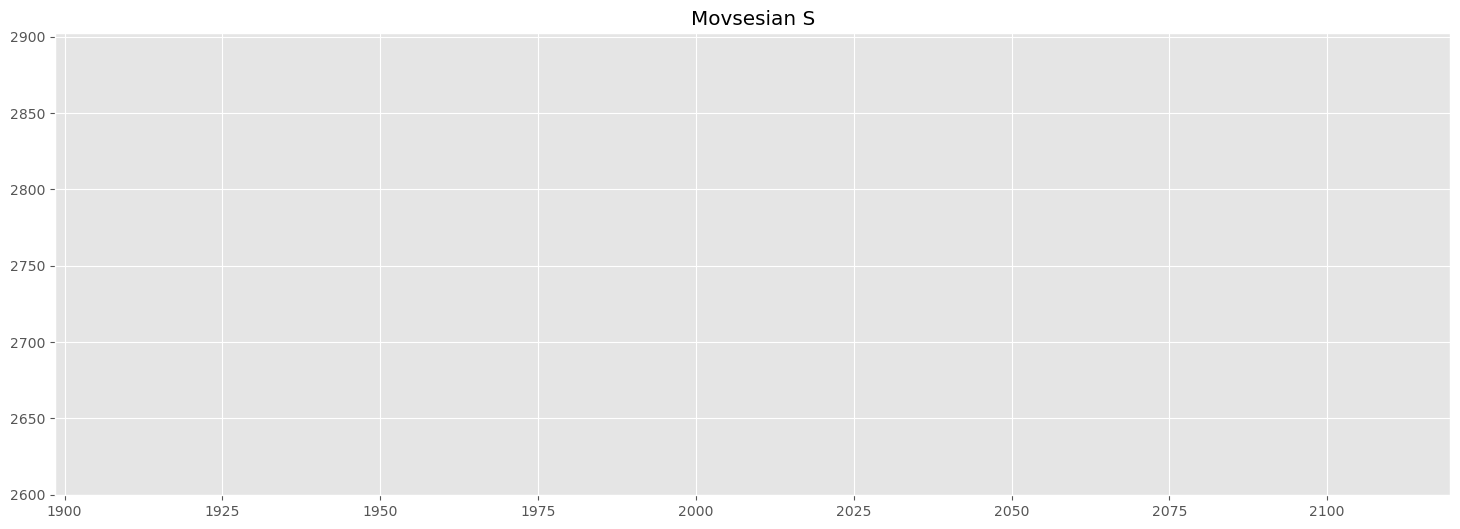

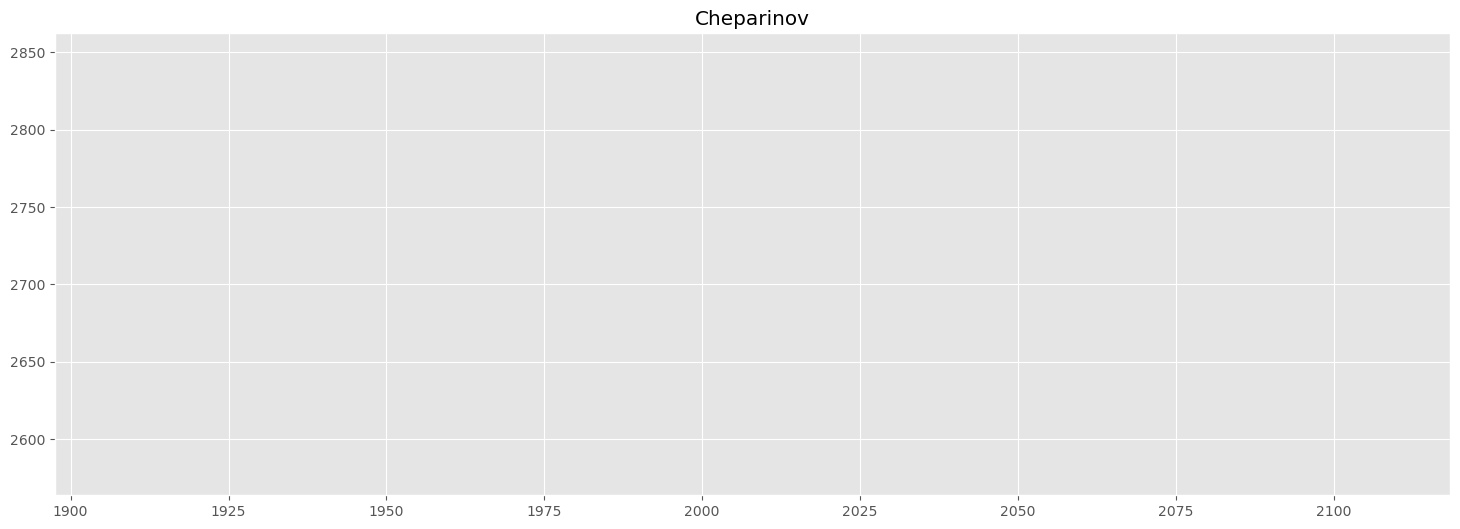

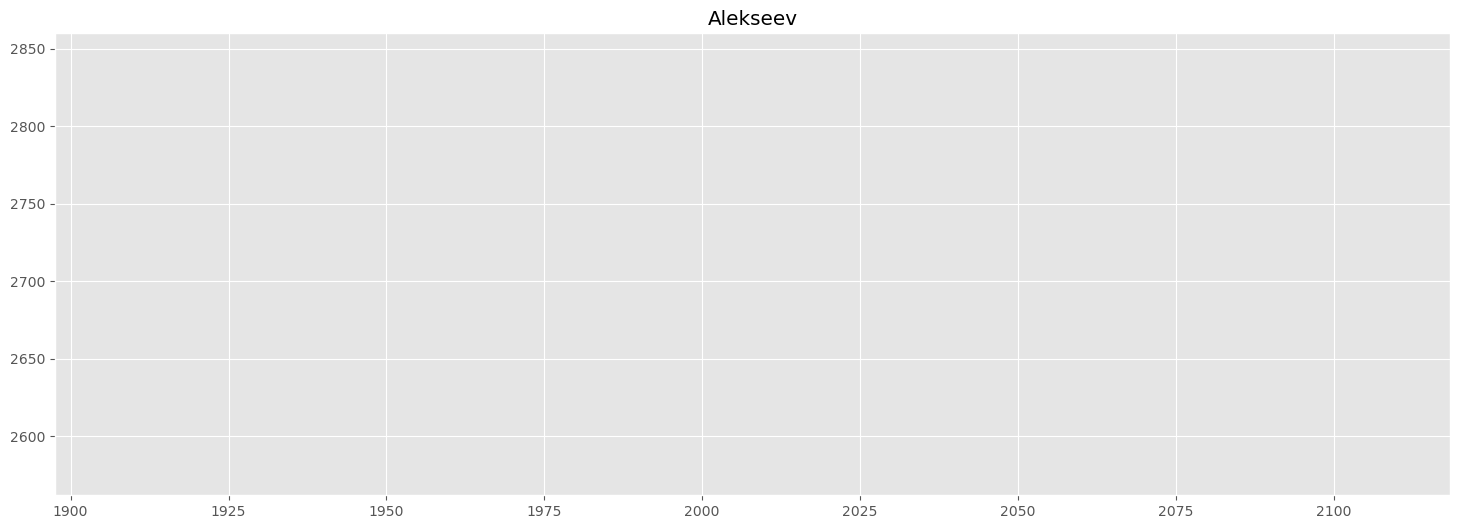

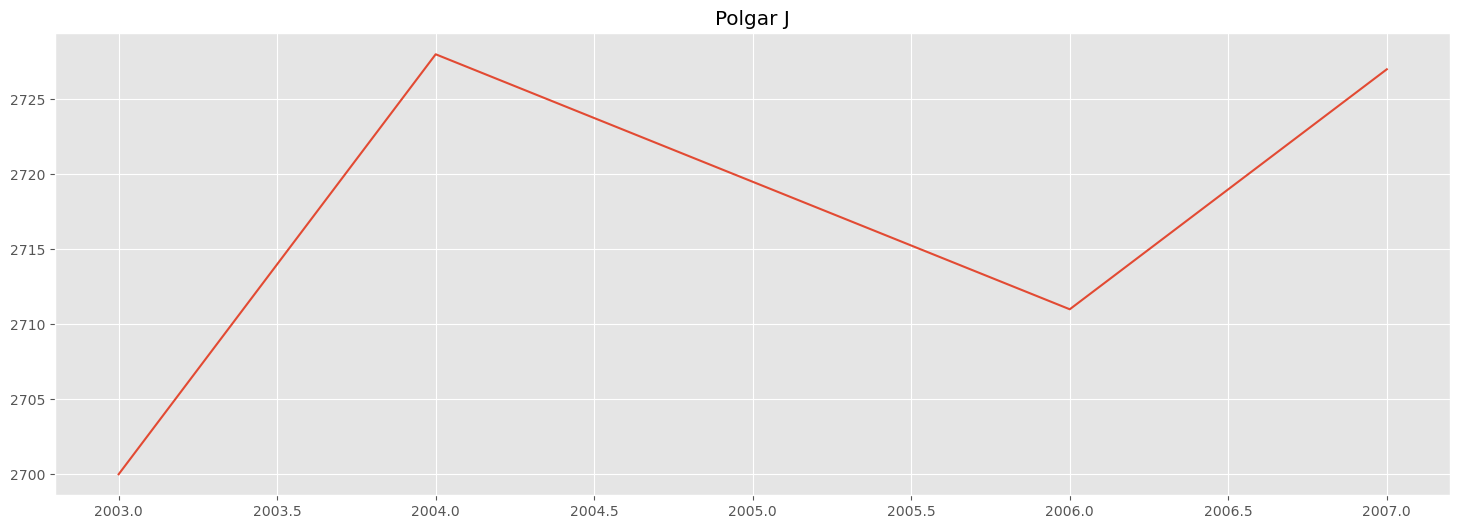

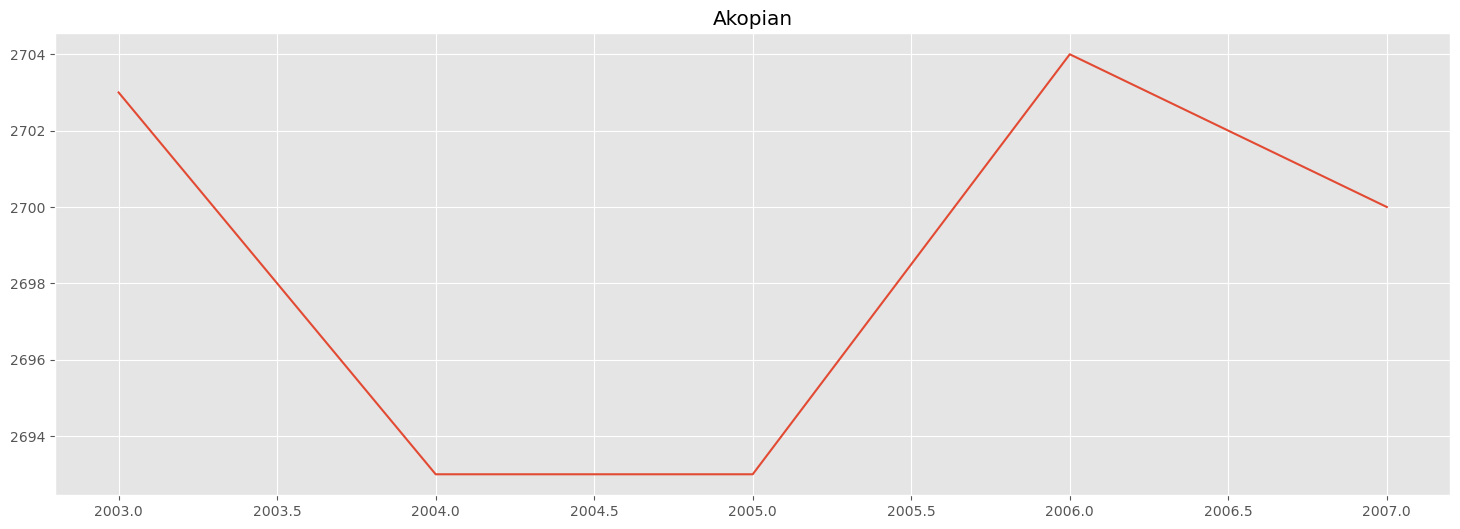

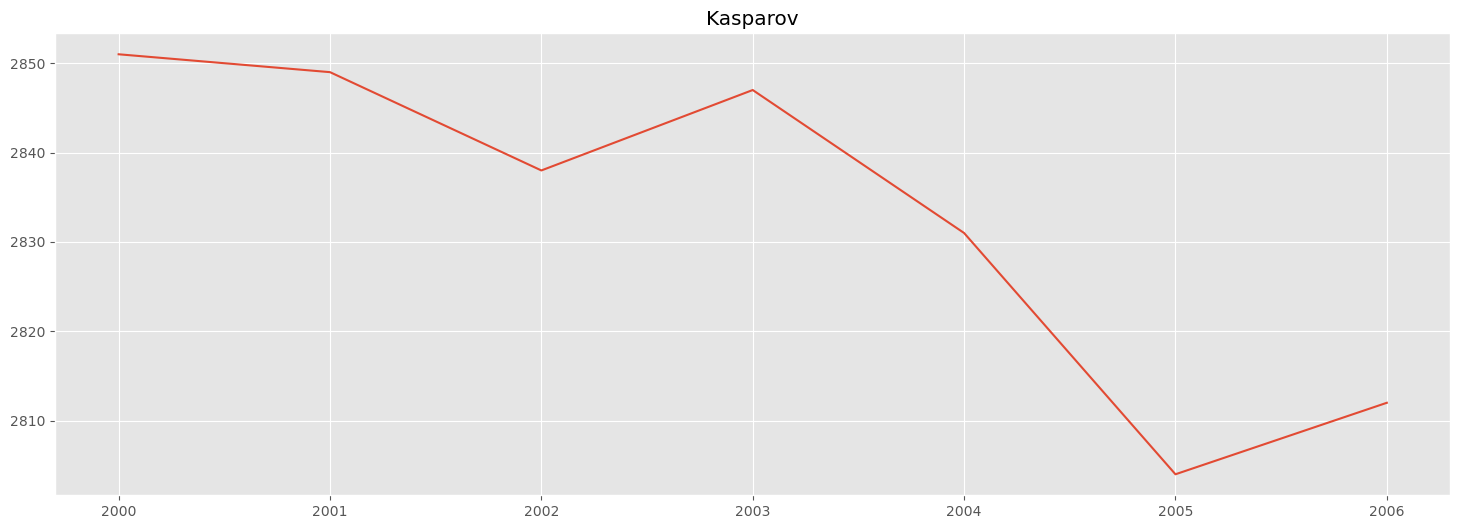

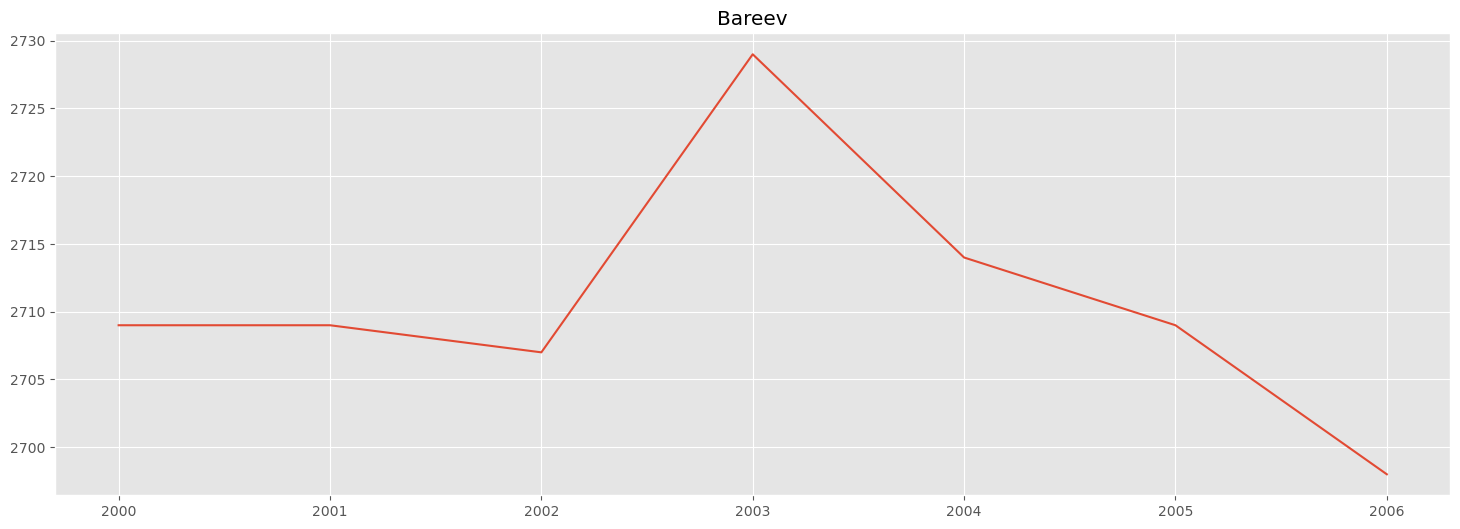

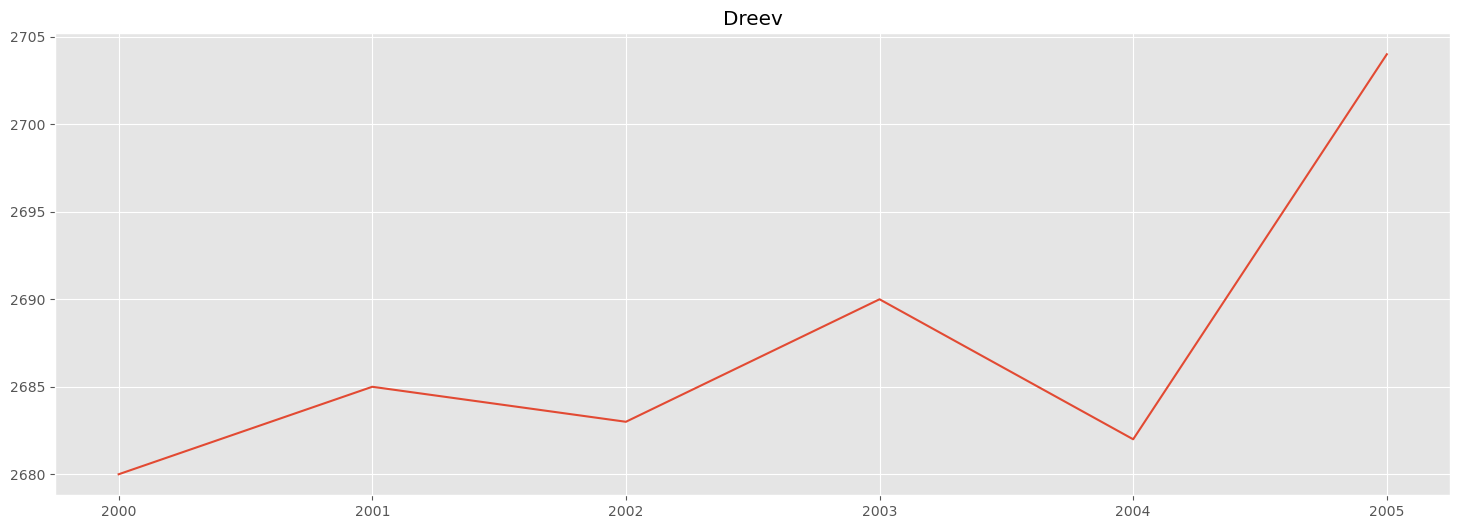

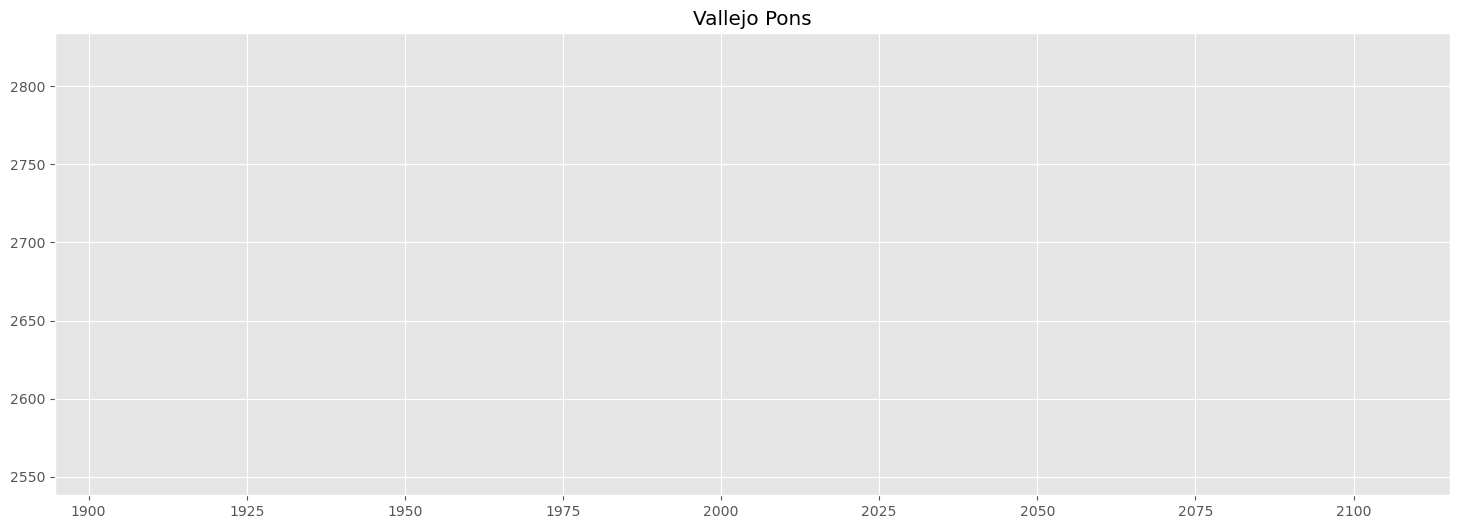

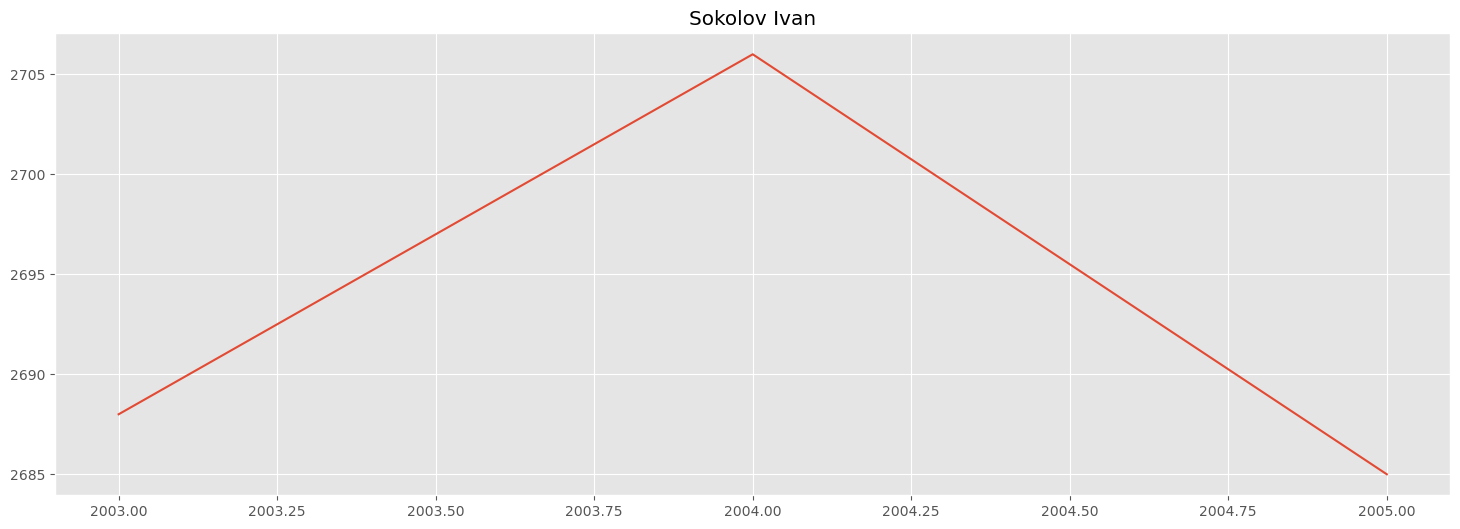

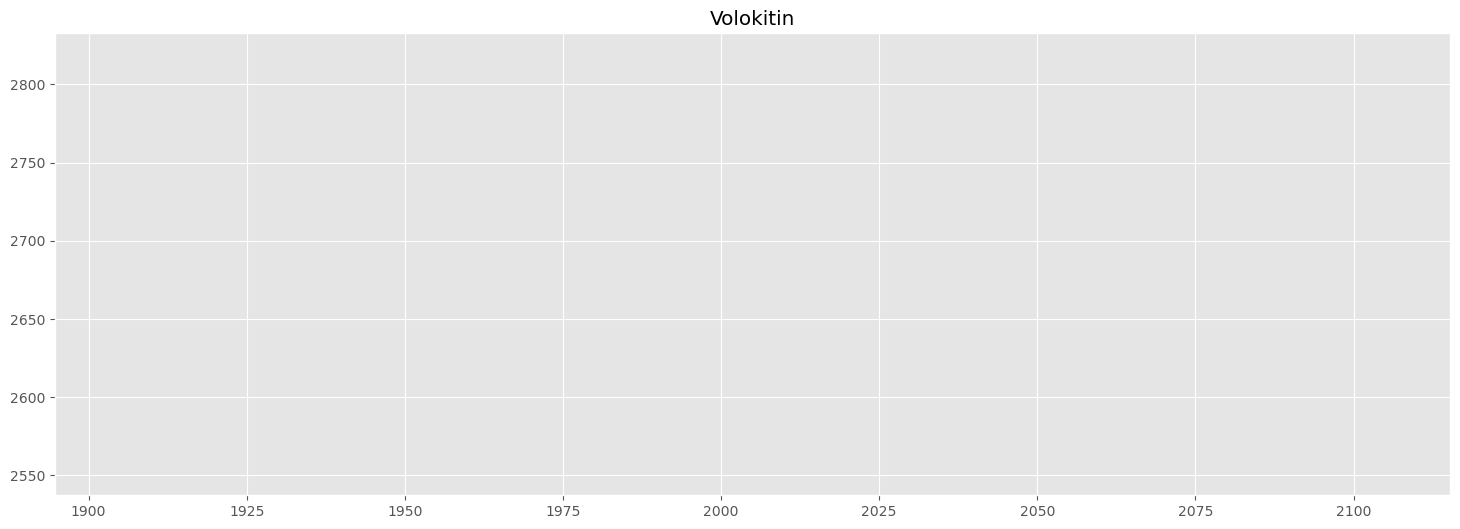

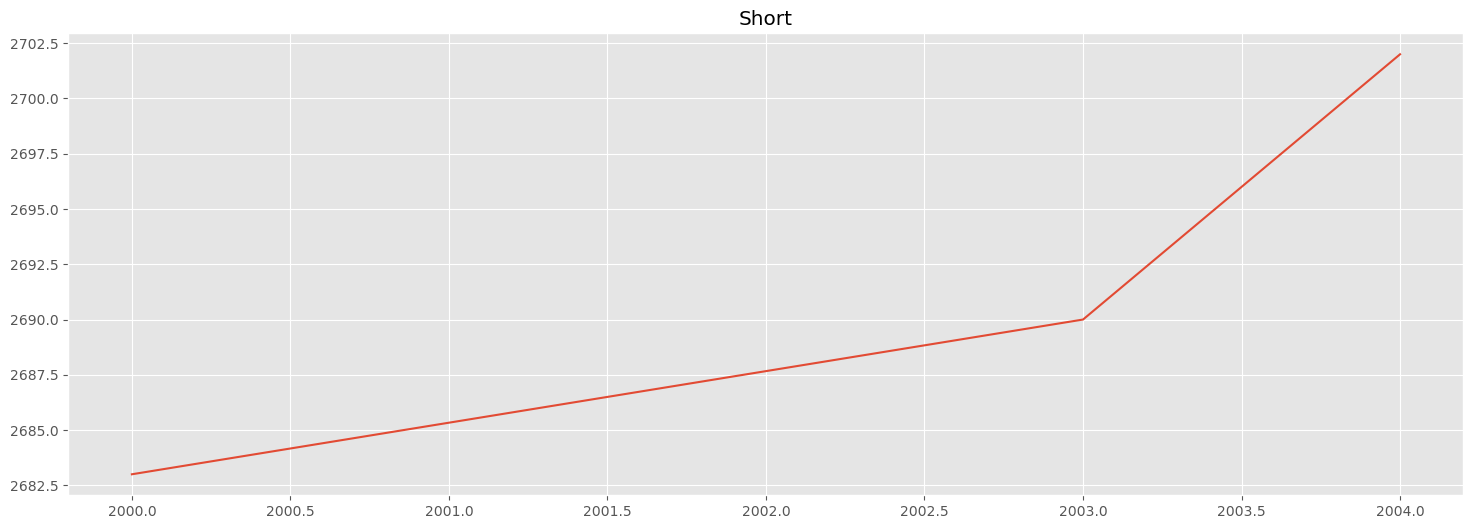

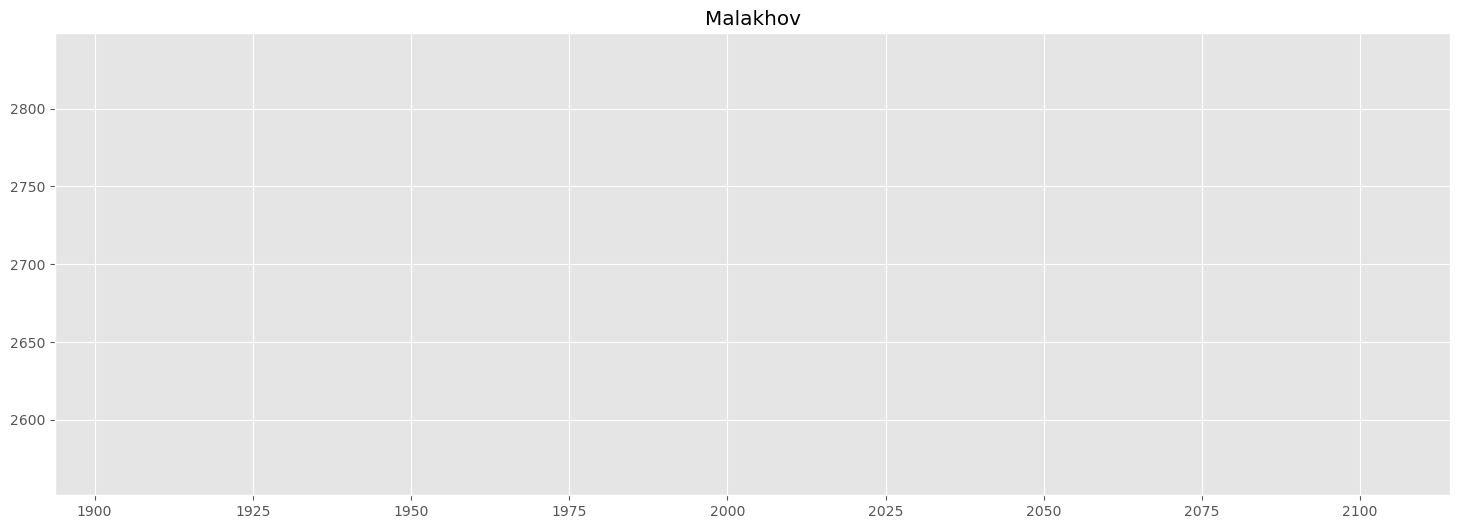

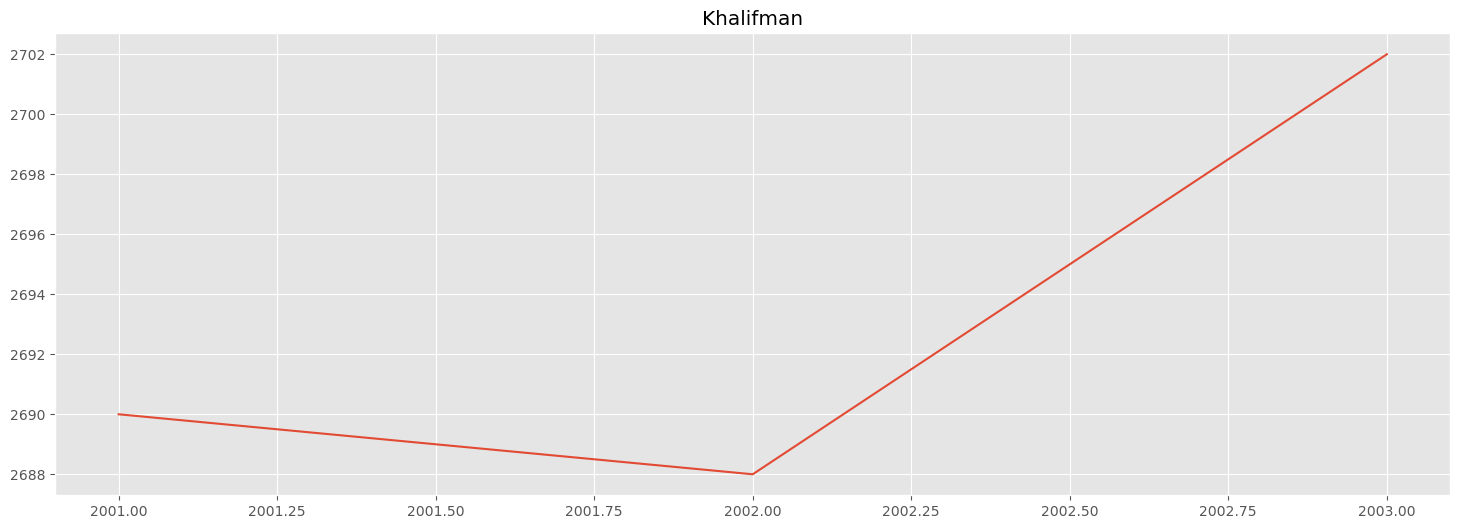

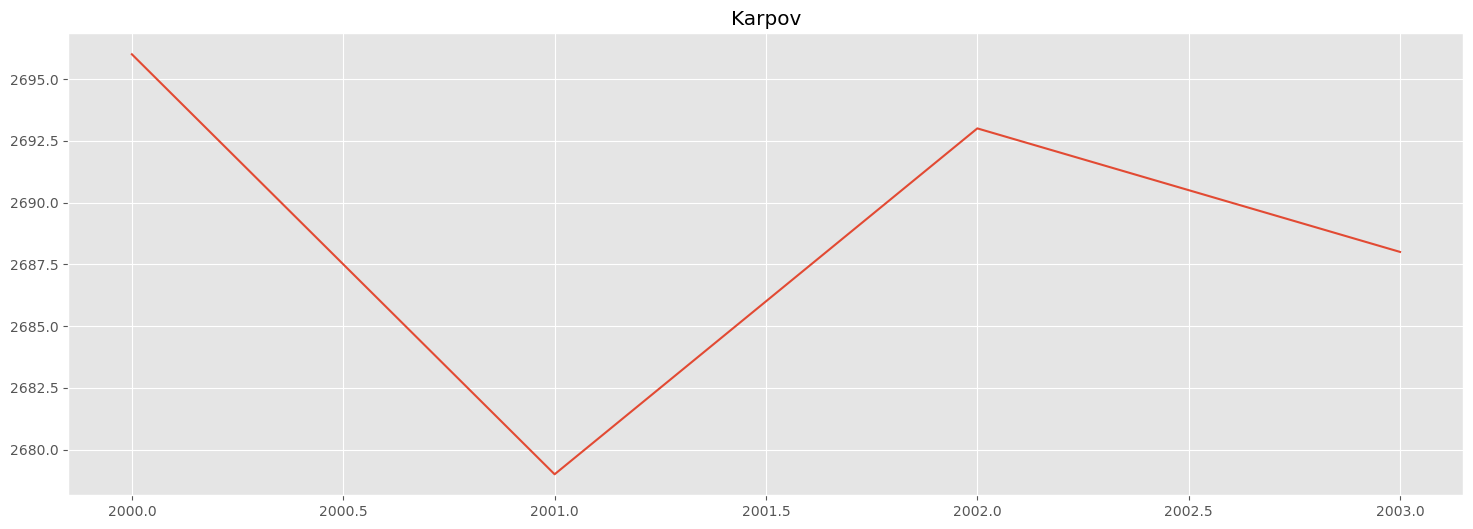

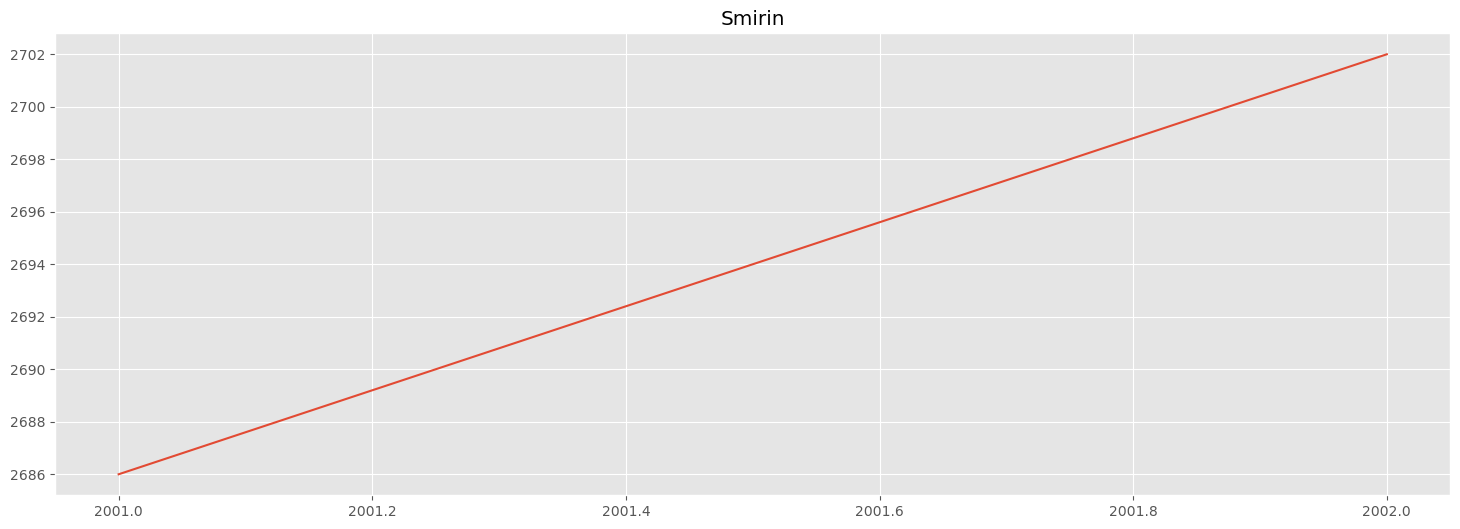

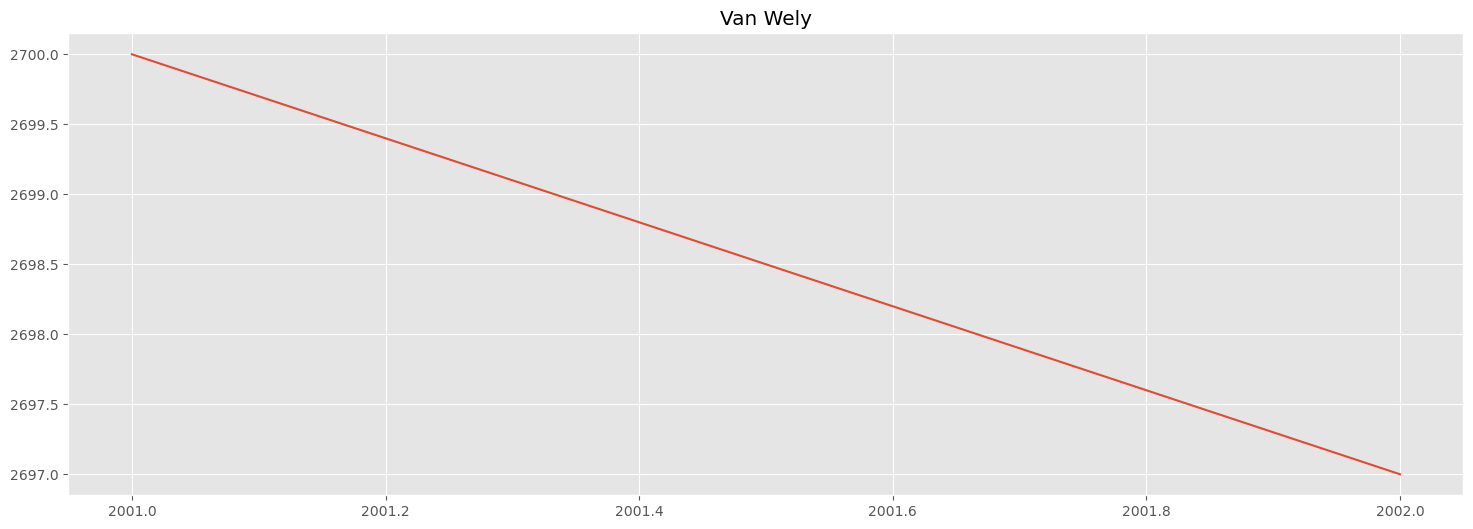

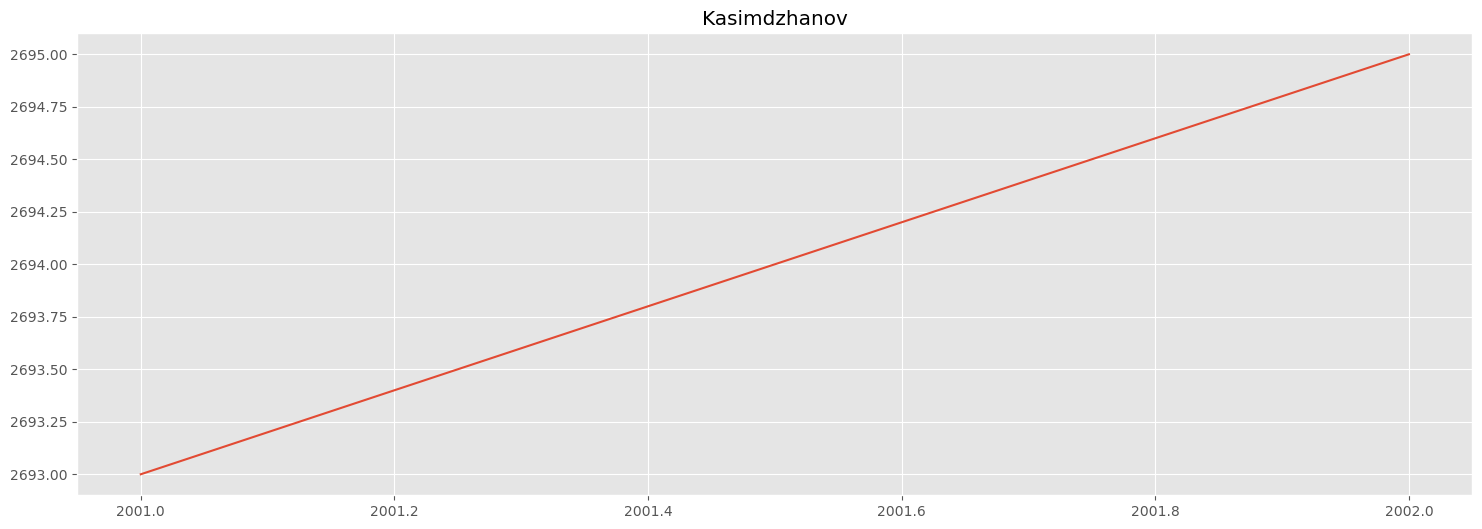

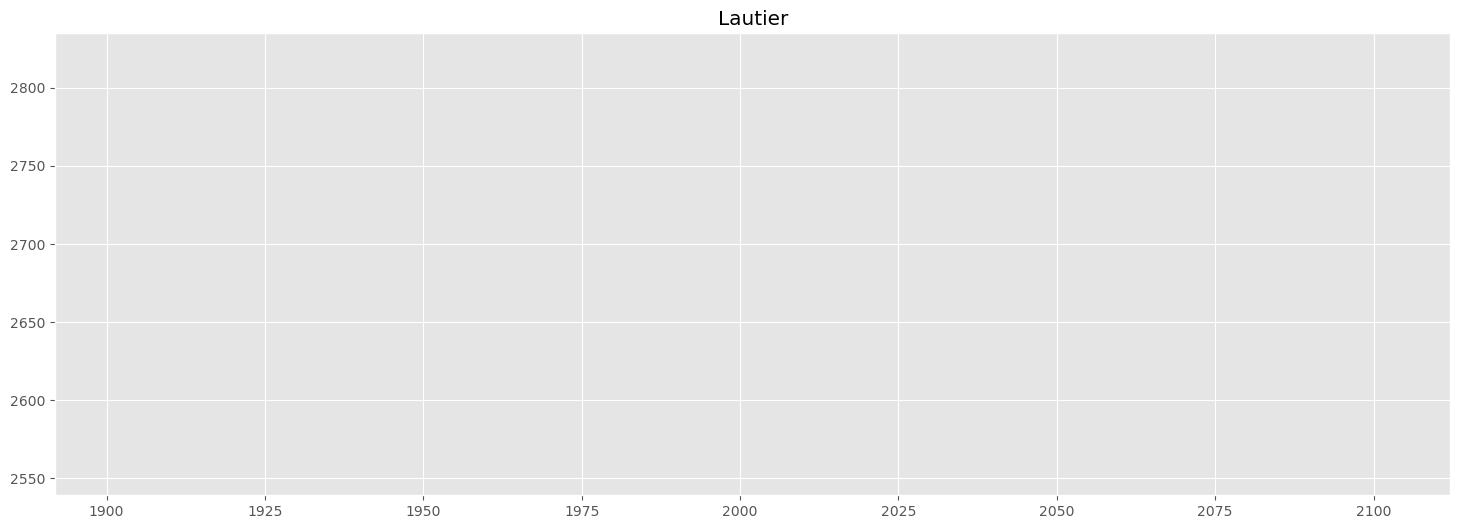

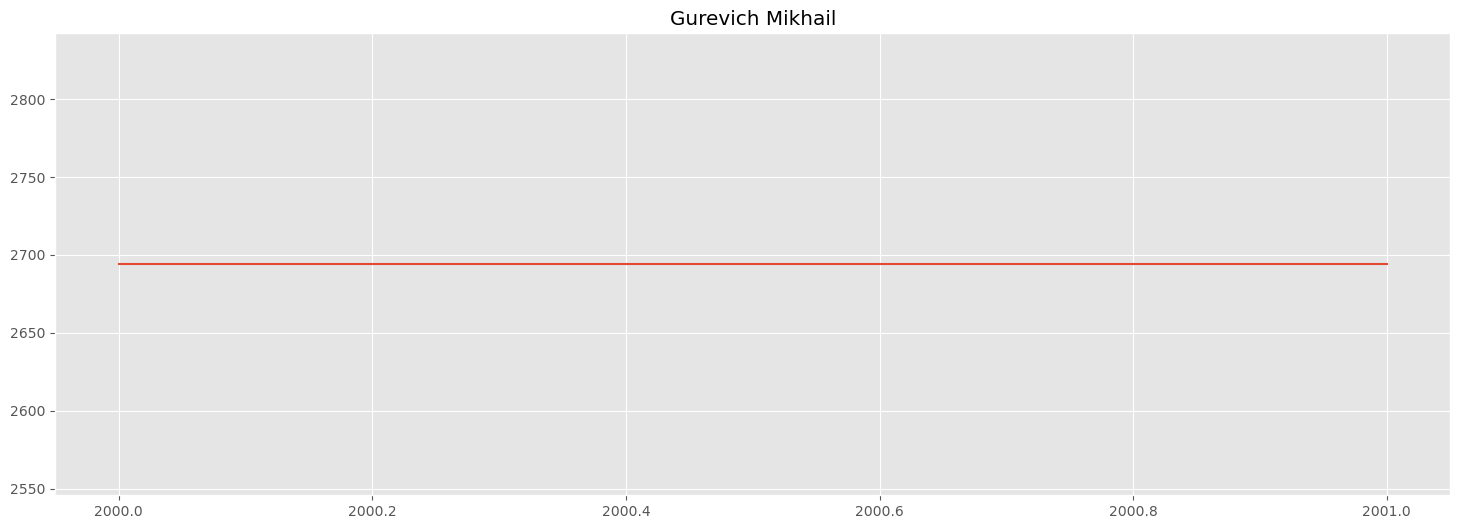

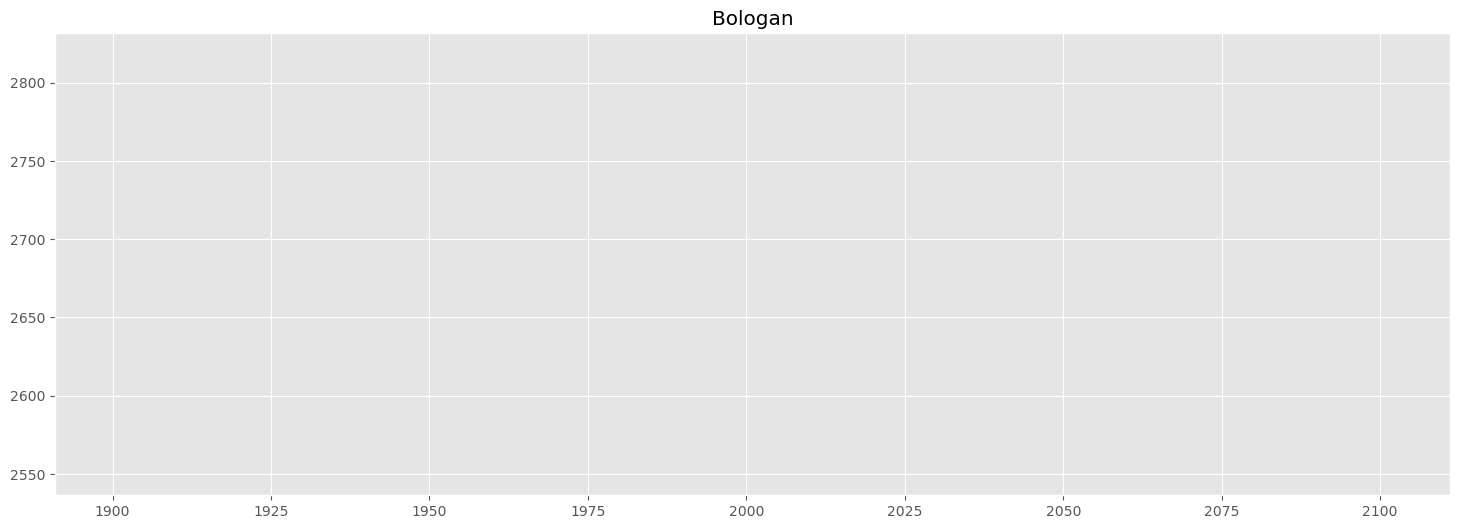

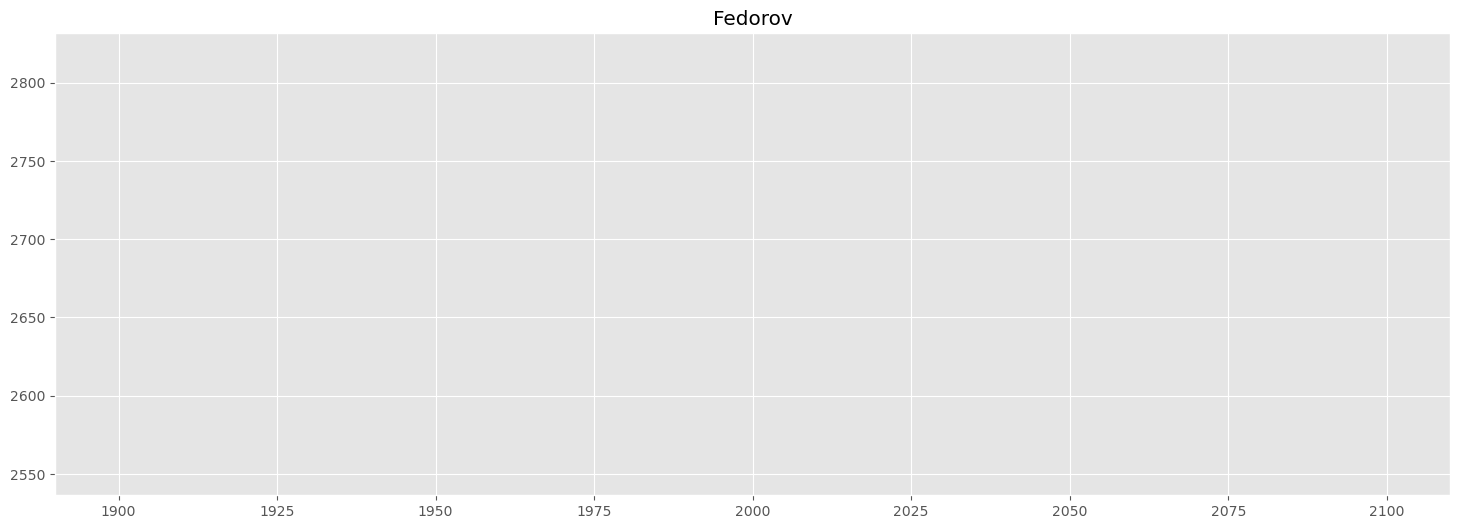

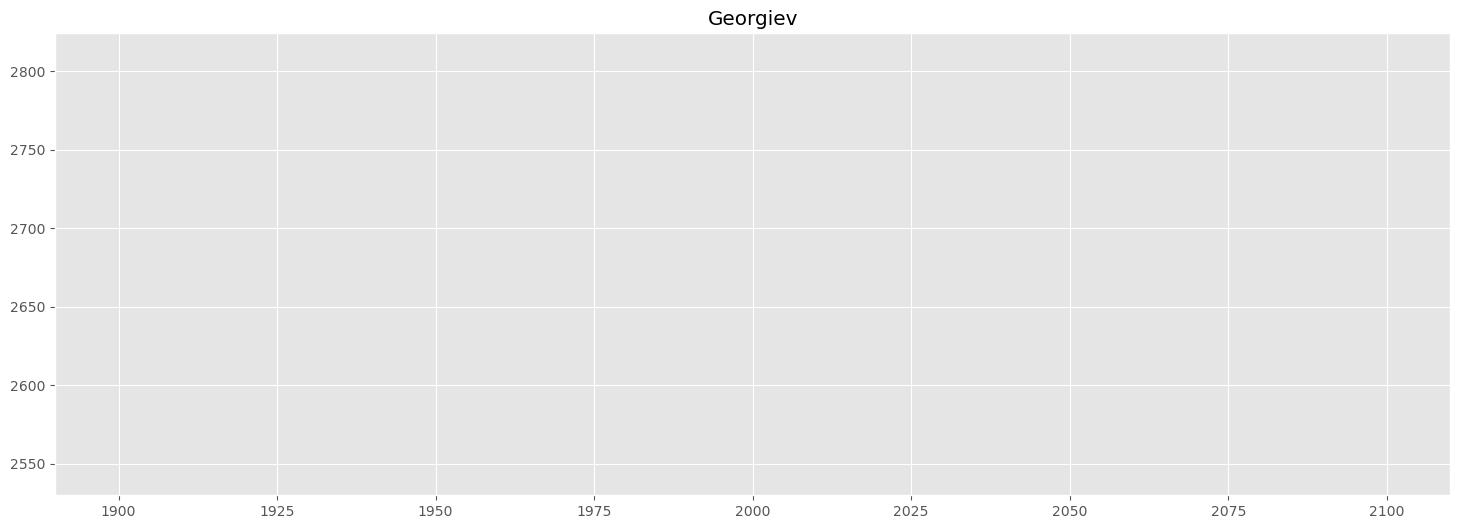

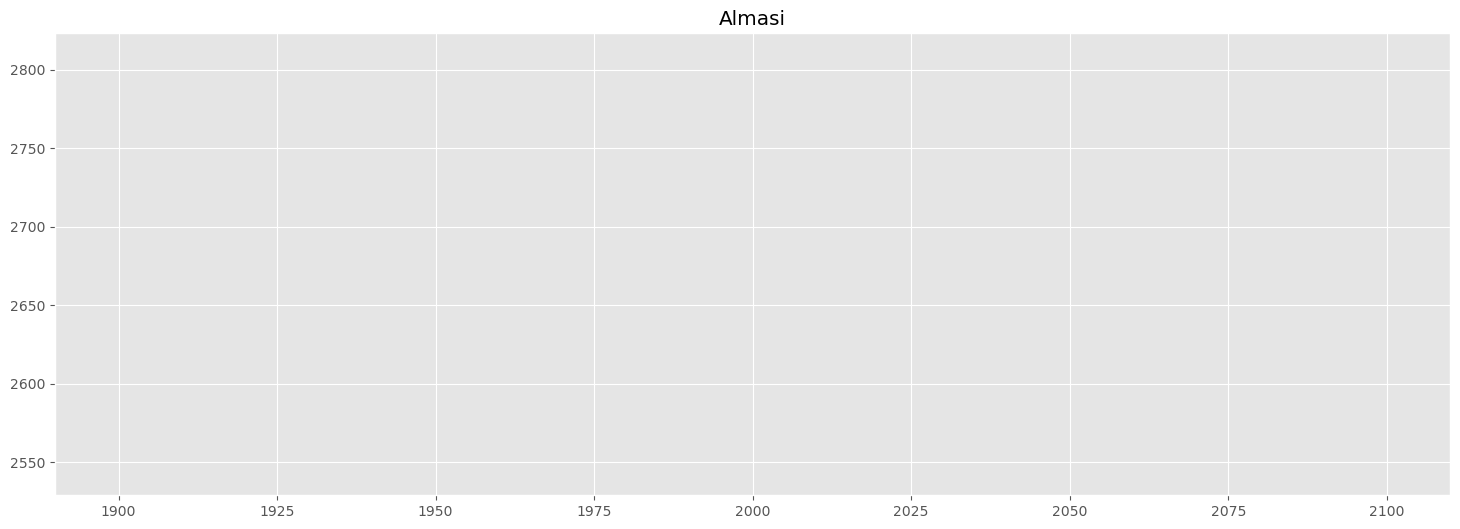

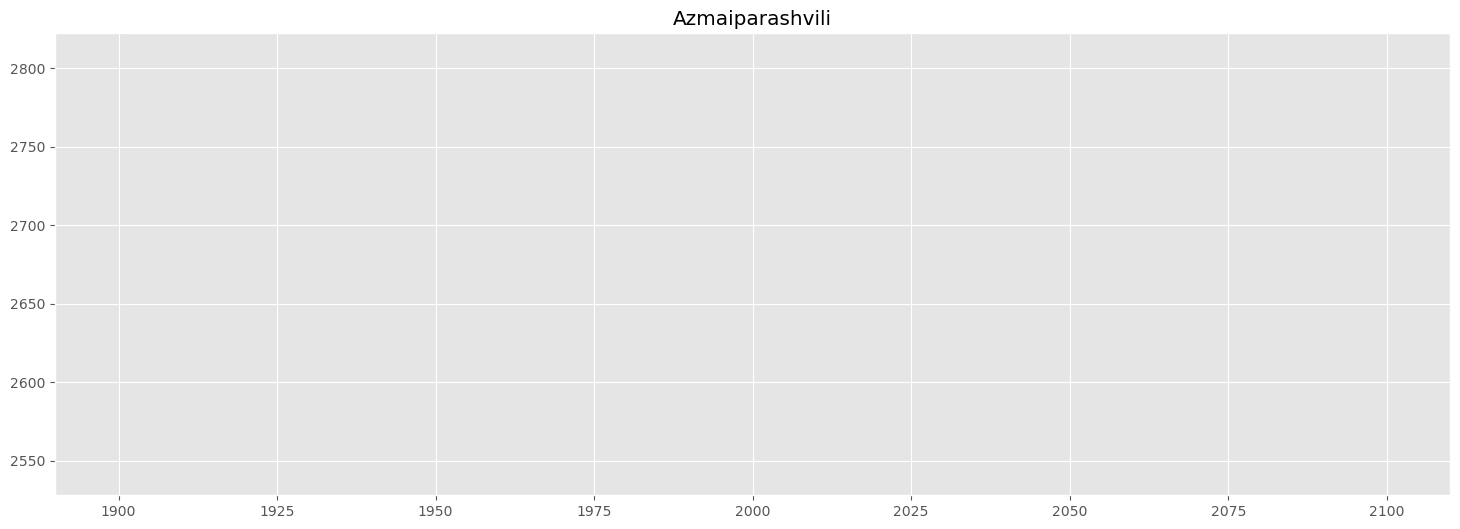

In [16]:
for name in player_names:
    player_rows = df[df['Name']==name]
    player_rows_sorted = player_rows.sort_values(by=['Year'])
    plt.figure(figsize=(18, 6))
    plt.plot(player_rows_sorted['Year'],player_rows_sorted['ELO']) 
    plt.title(name)


In [17]:
top_20_elo = df.nlargest(20, 'ELO')['ELO']
lowest_elo_row = df.loc[top_20_elo.idxmin()]
lowest_elo_row

Position (in January)           2
Name                      Caruana
ELO                          2820
Date                     2015 Jan
Age                            22
Year                         2015
Name: 121, dtype: object

In [22]:
top_20_avarage_age = df.nlargest(20, 'ELO')['Age'].mean()
top_20_average_age

28.6

In [25]:
df.nlargest(20, 'ELO')['Name'].value_counts()

Name
Carlsen     10
Kasparov     5
Caruana      5
Name: count, dtype: int64

In [28]:
avg_age_top_10_players = df.nlargest(10, 'ELO')['Age'].mean()
avg_age_top_10_players

29.1

In [29]:
df.nlargest(10,'ELO')

,Position (in January),Name,ELO,Date,Age,Year
20,1,Carlsen,2872,2020 Jan,29,2020
140,1,Carlsen,2872,2014 Jan,23,2014
0,1,Carlsen,2862,2021 Jan,30,2021
120,1,Carlsen,2862,2015 Jan,24,2015
160,1,Carlsen,2861,2013 Jan,22,2013
420,1,Kasparov,2851,2000 Jan,36,2000
400,1,Kasparov,2849,2001 Jan,37,2001
360,1,Kasparov,2847,2003 Jan,39,2003
100,1,Carlsen,2844,2016 Jan,25,2016
80,1,Carlsen,2840,2017 Jan,26,2017


In [35]:
players_top_elo_ids = df.groupby('Name')['ELO'].idxmax()
players_top_elos = df.loc[players_top_elo_ids]
average_age_top_10 = players_top_elos.nlargest(10,'ELO')['Age'].mean()
average_age_top_10

31.7

In [36]:
players_top_elos.nlargest(10,'ELO')

,Position (in January),Name,ELO,Date,Age,Year
20,1,Carlsen,2872,2020 Jan,29,2020
420,1,Kasparov,2851,2000 Jan,36,2000
41,2,Caruana,2828,2019 Jan,26,2019
42,3,Mamedyarov,2817,2019 Jan,33,2019
43,4,Ding Liren,2813,2019 Jan,26,2019
141,2,Aronian,2812,2014 Jan,31,2014
82,3,Kramnik,2811,2017 Jan,41,2017
201,2,Anand,2810,2011 Jan,41,2011
122,3,Grischuk,2810,2015 Jan,31,2015
83,4,So,2808,2017 Jan,23,2017
